In [53]:
import pandas as pd
pd.set_option("display.max_columns", None)
import seaborn as sns
import matplotlib.pyplot as plt

## EDA and Data Processing

In [2]:
df = pd.read_csv("dataset/logistic_regression.csv")
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [3]:
df.shape

(396030, 27)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

### term, emp_length to convert to Float/Int type

In [5]:
print(df["term"].unique())
df["term"] = pd.to_numeric(df["term"].apply(lambda x: x.strip().split(" ")[0]))

[' 36 months' ' 60 months']


In [6]:
print(df["emp_length"].unique())
def get_emp_duration_type(value):
    return (
        "greaterthan" if pd.notna(value) and list(value.strip())[2] == "+" 
        else "lessthan" if pd.notna(value) and list(value.strip())[0] == "<"
        else "equalsto"
        )
    
df["emp_duration_type"] = df["emp_length"].apply(get_emp_duration_type)

['10+ years' '4 years' '< 1 year' '6 years' '9 years' '2 years' '3 years'
 '8 years' '7 years' '5 years' '1 year' nan]


In [7]:
df["emp_duration_type"].value_counts()

emp_duration_type
equalsto       238264
greaterthan    126041
lessthan        31725
Name: count, dtype: int64

In [8]:
print(df["emp_length"].unique())
def get_emp_duration(value):
    return (
        10 if pd.notna(value) and list(value.strip())[2] == "+" 
        else 1 if pd.notna(value) and list(value.strip())[0] == "<"
        else int(value.strip().split()[0]) if pd.notna(value)
        else value
        )
    
df["emp_length"] = df["emp_length"].apply(get_emp_duration)

['10+ years' '4 years' '< 1 year' '6 years' '9 years' '2 years' '3 years'
 '8 years' '7 years' '5 years' '1 year' nan]


In [9]:
df["emp_length"].value_counts()

emp_length
10.0    126041
1.0      57607
2.0      35827
3.0      31665
5.0      26495
4.0      23952
6.0      20841
7.0      20819
8.0      19168
9.0      15314
Name: count, dtype: int64

### issue_d, earliest_cr_line to convert to Datetime

In [10]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,emp_duration_type
0,10000.0,36,11.44,329.48,B,B4,Marketing,10.0,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",greaterthan
1,8000.0,36,11.99,265.68,B,B5,Credit analyst,4.0,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",equalsto
2,15600.0,36,10.49,506.97,B,B3,Statistician,1.0,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",lessthan
3,7200.0,36,6.49,220.65,A,A2,Client Advocate,6.0,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",equalsto
4,24375.0,60,17.27,609.33,C,C5,Destiny Management Inc.,9.0,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",equalsto


In [11]:
print(df["issue_d"].unique())
df["issue_month"] = df["issue_d"].apply(lambda x: x.strip().split("-")[0])
df["issue_year"] = df["issue_d"].apply(lambda x: x.strip().split("-")[1])

['Jan-2015' 'Nov-2014' 'Apr-2013' 'Sep-2015' 'Sep-2012' 'Oct-2014'
 'Apr-2012' 'Jun-2013' 'May-2014' 'Dec-2015' 'Apr-2015' 'Oct-2012'
 'Jul-2014' 'Feb-2013' 'Oct-2015' 'Jan-2014' 'Mar-2016' 'Apr-2014'
 'Jun-2011' 'Apr-2010' 'Jun-2014' 'Oct-2013' 'May-2013' 'Feb-2015'
 'Oct-2011' 'Jun-2015' 'Aug-2013' 'Feb-2014' 'Dec-2011' 'Mar-2013'
 'Jun-2016' 'Mar-2014' 'Nov-2013' 'Dec-2014' 'Apr-2016' 'Sep-2013'
 'May-2016' 'Jul-2015' 'Jul-2013' 'Aug-2014' 'May-2008' 'Mar-2010'
 'Dec-2013' 'Mar-2012' 'Mar-2015' 'Sep-2011' 'Jul-2012' 'Dec-2012'
 'Sep-2014' 'Nov-2012' 'Nov-2015' 'Jan-2011' 'May-2012' 'Feb-2016'
 'Jun-2012' 'Aug-2012' 'Jan-2016' 'May-2015' 'Oct-2016' 'Aug-2015'
 'Jul-2016' 'May-2009' 'Aug-2016' 'Jan-2012' 'Jan-2013' 'Nov-2010'
 'Jul-2011' 'Mar-2011' 'Feb-2012' 'May-2011' 'Aug-2010' 'Nov-2016'
 'Jul-2010' 'Sep-2010' 'Dec-2010' 'Feb-2011' 'Jun-2009' 'Aug-2011'
 'Dec-2016' 'Mar-2009' 'Jun-2010' 'May-2010' 'Nov-2011' 'Sep-2016'
 'Oct-2009' 'Mar-2008' 'Nov-2008' 'Dec-2009' 'Oct-2010' 'Sep-2

In [12]:
df.issue_month.value_counts()

issue_month
Oct    42130
Jul    39714
Jan    34682
Nov    34068
Apr    33223
Aug    32816
Mar    31919
May    31895
Jun    30140
Dec    29082
Feb    28742
Sep    27619
Name: count, dtype: int64

In [13]:
df.issue_year.value_counts()

issue_year
2014    102860
2013     97662
2015     94264
2012     41202
2016     28088
2011     17435
2010      9258
2009      3826
2008      1240
2007       195
Name: count, dtype: int64

In [14]:
df["earliest_cr_line"].nunique()

684

In [15]:
print(df["earliest_cr_line"].unique())
df["earliest_cr_month"] = df["earliest_cr_line"].apply(lambda x: x.strip().split("-")[0])
df["earliest_cr_year"] = df["earliest_cr_line"].apply(lambda x: x.strip().split("-")[1])

['Jun-1990' 'Jul-2004' 'Aug-2007' 'Sep-2006' 'Mar-1999' 'Jan-2005'
 'Aug-2005' 'Sep-1994' 'Jun-1994' 'Dec-1997' 'Dec-1990' 'May-1984'
 'Apr-1995' 'Jan-1997' 'May-2001' 'Mar-1982' 'Sep-1996' 'Jan-1990'
 'Mar-2000' 'Jan-2006' 'Oct-2006' 'Jan-2003' 'May-2008' 'Oct-2003'
 'Jun-2004' 'Jan-1999' 'Apr-1994' 'Apr-1998' 'Jul-2007' 'Apr-2002'
 'Oct-2007' 'Jun-2009' 'May-1997' 'Jul-2006' 'Sep-2003' 'Aug-1992'
 'Dec-1988' 'Feb-2002' 'Jan-1992' 'Aug-2001' 'Dec-2010' 'Oct-1999'
 'Sep-2004' 'Aug-1994' 'Jul-2003' 'Apr-2000' 'Dec-2004' 'Jun-1995'
 'Dec-2003' 'Jul-1994' 'Oct-1990' 'Dec-2001' 'Apr-1999' 'Feb-1995'
 'May-2003' 'Oct-2002' 'Mar-2004' 'Aug-2003' 'Oct-2000' 'Nov-2004'
 'Mar-2010' 'Mar-1996' 'May-1994' 'Jun-1996' 'Nov-1986' 'Jan-2001'
 'Jan-2002' 'Mar-2001' 'Sep-2012' 'Apr-2006' 'May-1998' 'Dec-2002'
 'Nov-2003' 'Oct-2005' 'May-1990' 'Jun-2003' 'Jun-2001' 'Jan-1998'
 'Oct-1978' 'Feb-2001' 'Jun-2006' 'Aug-1993' 'Apr-2001' 'Nov-2001'
 'Feb-2003' 'Jun-1993' 'Sep-1992' 'Nov-1992' 'Jun-1983' 'Oct-2

In [16]:
df.earliest_cr_month.value_counts()

earliest_cr_month
Oct    38291
Sep    37673
Aug    37349
Nov    35583
Dec    33687
Jul    31972
Mar    31617
Jan    30694
Jun    30445
May    30445
Apr    29231
Feb    29043
Name: count, dtype: int64

In [17]:
df.earliest_cr_year.value_counts()

earliest_cr_year
2000    29366
2001    29083
1999    26491
2002    25901
2003    23657
        ...  
1951        3
1950        3
1953        2
1944        1
1948        1
Name: count, Length: 65, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  float64
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [19]:
df["address"][:5]

0       0174 Michelle Gateway\r\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3              823 Reid Ford\r\nDelacruzside, MA 00813
4               679 Luna Roads\r\nGreggshire, VA 11650
Name: address, dtype: object

In [20]:
import re

def clean_string(input_string):
    # Remove special characters
    cleaned_string = re.sub(r'[^A-Za-z0-9\s]', '', input_string)
    
    # Replace multiple spaces with a single space
    cleaned_string = re.sub(r'\s+', ' ', cleaned_string).strip()

    return cleaned_string

df["city"] = df["address"].apply(lambda x : clean_string(" ".join(x.split("\r\n")[-1].split(" ")[:-2])))
df["state"] = df["address"].apply(lambda x : x.split("\r\n")[-1].split(" ")[-2])
df["pincode"] = df["address"].apply(lambda x : x.strip().split("\r\n")[-1].split(" ")[-1])
df["appartment"] = df["address"].apply(lambda x : re.sub(r'\d+', '', x.split("\r\n")[0]))

In [21]:
df.city.value_counts()

city
DPO                 14289
APO                 14060
FPO                 14035
East Michael          311
Port Michael          305
                    ...  
Port Lynnmouth          1
South Erikashire        1
Lake Carmenport         1
Lake Geraldbury         1
North Peterville        1
Name: count, Length: 67513, dtype: int64

In [22]:
print('''
Since the distinct count for City is 67600.
It doesn't seems that we'll get learning out from City as of now, 
so we will be dicarding them later in data precessing"
''')


Since the distinct count for City is 67600.
It doesn't seems that we'll get learning out from City as of now, 
so we will be dicarding them later in data precessing"



In [23]:
state_counts = df.state.value_counts()

# # Create a mask for categories with count less than 5
# mask = df['state'].isin(state_counts[state_counts < 20].index)

# # Assign 'unique' to categories with count less than 5
# df.loc[mask, 'state'] = 'unique'

# df.state.value_counts()

In [24]:
df["address"][df["state"]=="Brittanyhaven"]

Series([], Name: address, dtype: object)

In [25]:
df.pincode.value_counts()

pincode
70466    56985
30723    56546
22690    56527
48052    55917
00813    45824
29597    45471
05113    45402
11650    11226
93700    11151
86630    10981
Name: count, dtype: int64

In [26]:
print(df.appartment.value_counts())
print('''
Since the distinct count for appartment is 2251142.
It doesn't seems that we'll get learning out from appartments as of now, 
so we will be dicarding them later in data precessing"
''')

appartment
Unit  Box               14289
PSC , Box               14060
USCGC Smith                83
USS Smith                  79
USNS Smith                 68
                        ...  
 Berry Trail Suite          1
 Ronald Pike                1
 Alvarez Mills Apt.         1
 Ford Port Apt.             1
 Blake Freeway Apt.         1
Name: count, Length: 225142, dtype: int64

Since the distinct count for appartment is 2251142.
It doesn't seems that we'll get learning out from appartments as of now, 
so we will be dicarding them later in data precessing"



In [27]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,emp_duration_type,issue_month,issue_year,earliest_cr_month,earliest_cr_year,city,state,pincode,appartment
0,10000.0,36,11.44,329.48,B,B4,Marketing,10.0,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",greaterthan,Jan,2015,Jun,1990,Mendozaberg,OK,22690,Michelle Gateway
1,8000.0,36,11.99,265.68,B,B5,Credit analyst,4.0,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",equalsto,Jan,2015,Jul,2004,Loganmouth,SD,05113,Carney Fort Apt.
2,15600.0,36,10.49,506.97,B,B3,Statistician,1.0,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",lessthan,Jan,2015,Aug,2007,New Sabrina,WV,05113,Mark Dale Apt.
3,7200.0,36,6.49,220.65,A,A2,Client Advocate,6.0,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",equalsto,Nov,2014,Sep,2006,Delacruzside,MA,00813,Reid Ford
4,24375.0,60,17.27,609.33,C,C5,Destiny Management Inc.,9.0,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",equalsto,Apr,2013,Mar,1999,Greggshire,VA,11650,Luna Roads


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  float64
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [29]:
df.describe()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,396030.000000,377729.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,41.698053,13.639400,431.849698,6.022566,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,10.212038,4.472157,250.727790,3.517094,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,36.000000,5.320000,16.080000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,36.000000,10.490000,250.330000,3.000000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,36.000000,13.330000,375.430000,6.000000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,36.000000,16.490000,567.300000,10.000000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,60.000000,30.990000,1533.810000,10.000000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [30]:
df.describe(include="object")

,grade,sub_grade,emp_title,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address,emp_duration_type,issue_month,issue_year,earliest_cr_month,earliest_cr_year,city,state,pincode,appartment
count,396030,396030,373103,396030,396030,396030,396030,396030,394274,396030,396030,396030,396030,396030,396030,396030,396030,396030,396030,396030,396030,396030
unique,7,35,173105,6,3,115,2,14,48816,684,2,3,393700,3,12,10,12,65,67513,54,10,225142
top,B,B3,Teacher,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\r\nFPO AE 70466,equalsto,Oct,2014,Oct,2000,DPO,AP,70466,Unit Box
freq,116018,26655,4389,198348,139563,14846,318357,234507,152472,3017,238066,395319,8,238264,42130,102860,38291,29366,14289,14308,56985,14289


In [31]:
print(
'''
Object Columns to drop as per my bussiness understanding -
emp_title, issue_d, title, earliest_cr_line, address, city, appartment
'''
)
df.drop(columns=["emp_title", "issue_d", "title", "earliest_cr_line", 'address', 'city', 'appartment'], errors="ignore", inplace=True)


Object Columns to drop as per my bussiness understanding -
emp_title, issue_d, title, earliest_cr_line, address, city, appartment



In [32]:
df.describe(include="object")

,grade,sub_grade,home_ownership,verification_status,loan_status,purpose,initial_list_status,application_type,emp_duration_type,issue_month,issue_year,earliest_cr_month,earliest_cr_year,state,pincode
count,396030,396030,396030,396030,396030,396030,396030,396030,396030,396030,396030,396030,396030,396030,396030
unique,7,35,6,3,2,14,2,3,3,12,10,12,65,54,10
top,B,B3,MORTGAGE,Verified,Fully Paid,debt_consolidation,f,INDIVIDUAL,equalsto,Oct,2014,Oct,2000,AP,70466
freq,116018,26655,198348,139563,318357,234507,238066,395319,238264,42130,102860,38291,29366,14308,56985


In [33]:
df.grade.unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [34]:
df.sub_grade.unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [35]:
print(df.groupby(["sub_grade"])["loan_status"].value_counts())

sub_grade  loan_status
A1         Fully Paid     9450
           Charged Off     279
A2         Fully Paid     9106
           Charged Off     461
A3         Fully Paid     9962
                          ... 
G3         Fully Paid      270
G4         Fully Paid      206
           Charged Off     168
G5         Charged Off     159
           Fully Paid      157
Name: count, Length: 70, dtype: int64


In [36]:
print('''
After looking at the ration it seems A1 is less risky and G5 is more riskier customer,
we'll be doing Label encoding according to that on Grade and Sub-Grade
''')


After looking at the ration it seems A1 is less risky and G5 is more riskier customer,
we'll be doing Label encoding according to that on Grade and Sub-Grade



In [37]:
def encodegrade(value):
    encode_map={
        "A":1,
        "B":2,
        "C":3,
        "D":4,
        "E":5,
        "F":6,
        "G":7
    }
    return encode_map[value]

df["grade"] = df["grade"].apply(encodegrade)
df["sub_grade"] = pd.to_numeric(df["sub_grade"].apply(lambda x: list(x)[-1]))

In [38]:
df.describe(include="object")

,home_ownership,verification_status,loan_status,purpose,initial_list_status,application_type,emp_duration_type,issue_month,issue_year,earliest_cr_month,earliest_cr_year,state,pincode
count,396030,396030,396030,396030,396030,396030,396030,396030,396030,396030,396030,396030,396030
unique,6,3,2,14,2,3,3,12,10,12,65,54,10
top,MORTGAGE,Verified,Fully Paid,debt_consolidation,f,INDIVIDUAL,equalsto,Oct,2014,Oct,2000,AP,70466
freq,198348,139563,318357,234507,238066,395319,238264,42130,102860,38291,29366,14308,56985


In [39]:
df.describe()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,377729.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,41.698053,13.639400,431.849698,2.822337,2.971798,6.022566,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,10.212038,4.472157,250.727790,1.333809,1.406773,3.517094,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,36.000000,5.320000,16.080000,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,36.000000,10.490000,250.330000,2.000000,2.000000,3.000000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,36.000000,13.330000,375.430000,3.000000,3.000000,6.000000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,36.000000,16.490000,567.300000,4.000000,4.000000,10.000000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,60.000000,30.990000,1533.810000,7.000000,5.000000,10.000000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


### Visualization

In [40]:
# UNIVARIATE
len(df.describe().columns), df.describe().columns

(16,
 Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
        'emp_length', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal',
        'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies'],
       dtype='object'))

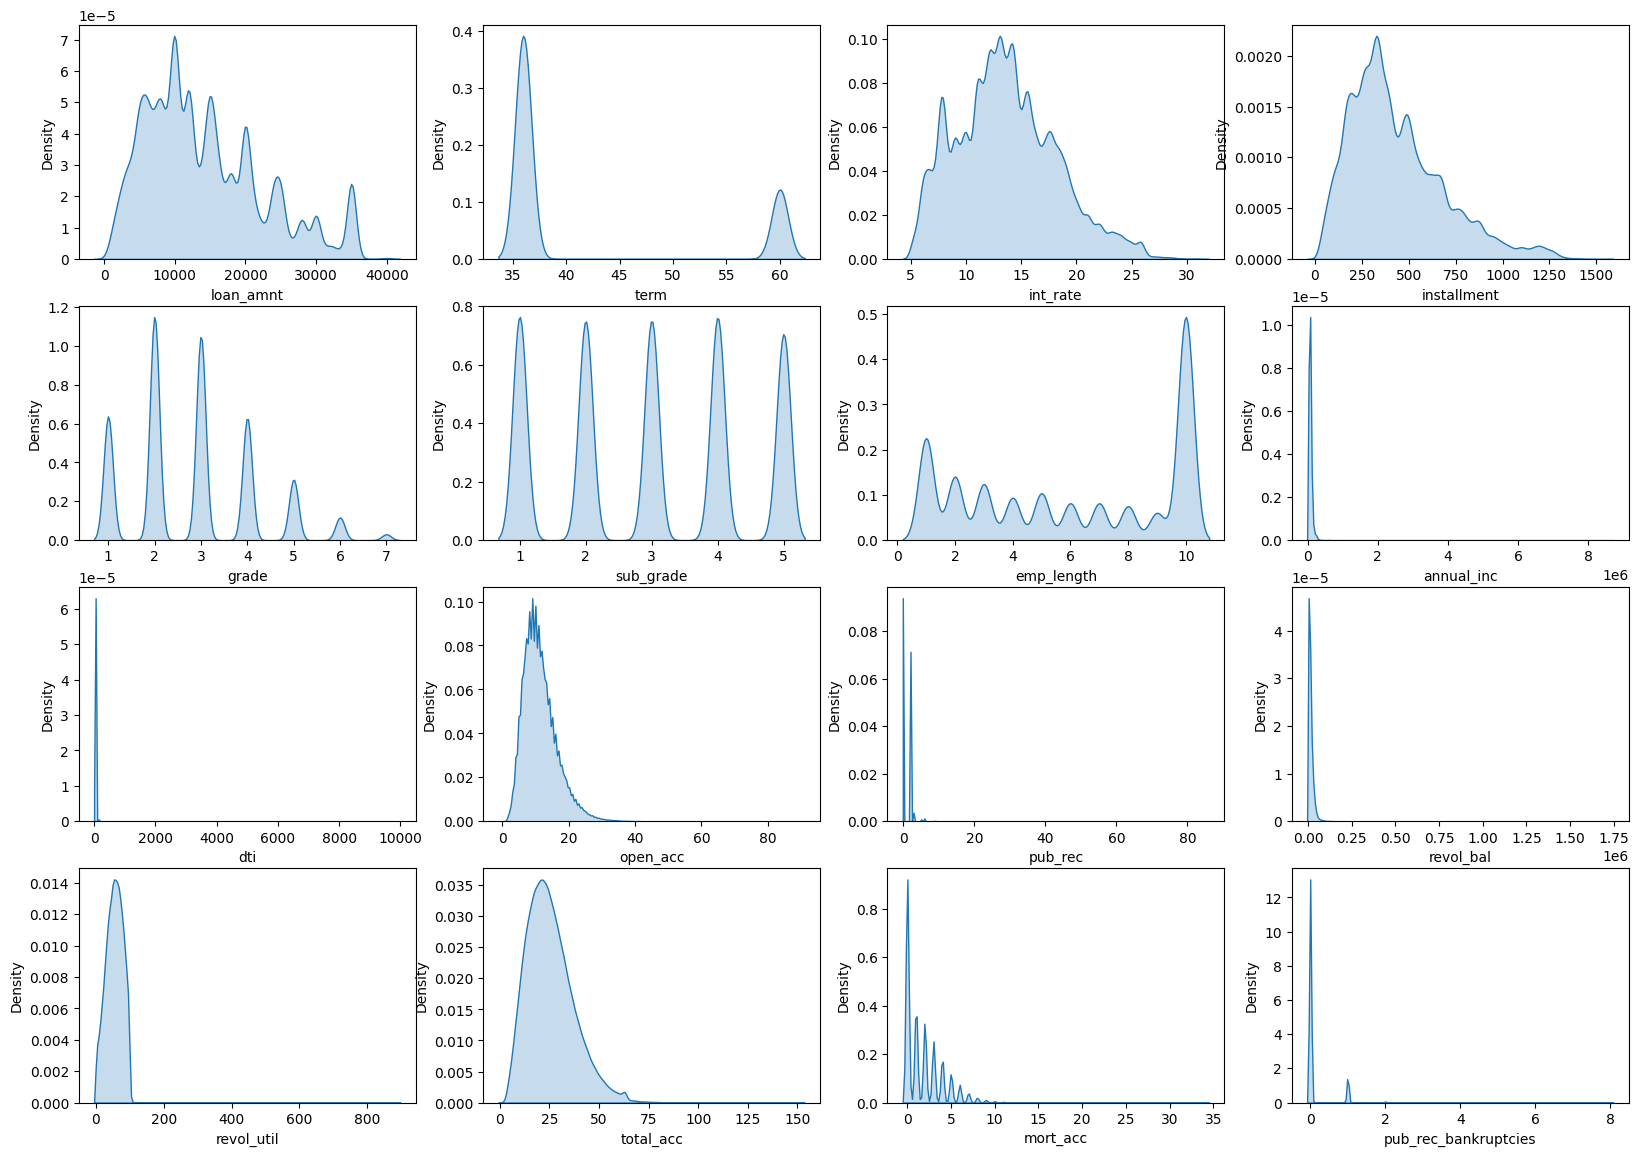

In [41]:
fig=plt.figure(figsize=(20,14)) # width*height
for ind_number, col_name in enumerate(df.describe().columns):
    if ind_number<16:
        plt.subplot(4,4,ind_number+1)
        sns.kdeplot(df[col_name], fill=True)

In [42]:
len(df.describe(include="object").columns), df.describe(include="object").columns

(13,
 Index(['home_ownership', 'verification_status', 'loan_status', 'purpose',
        'initial_list_status', 'application_type', 'emp_duration_type',
        'issue_month', 'issue_year', 'earliest_cr_month', 'earliest_cr_year',
        'state', 'pincode'],
       dtype='object'))

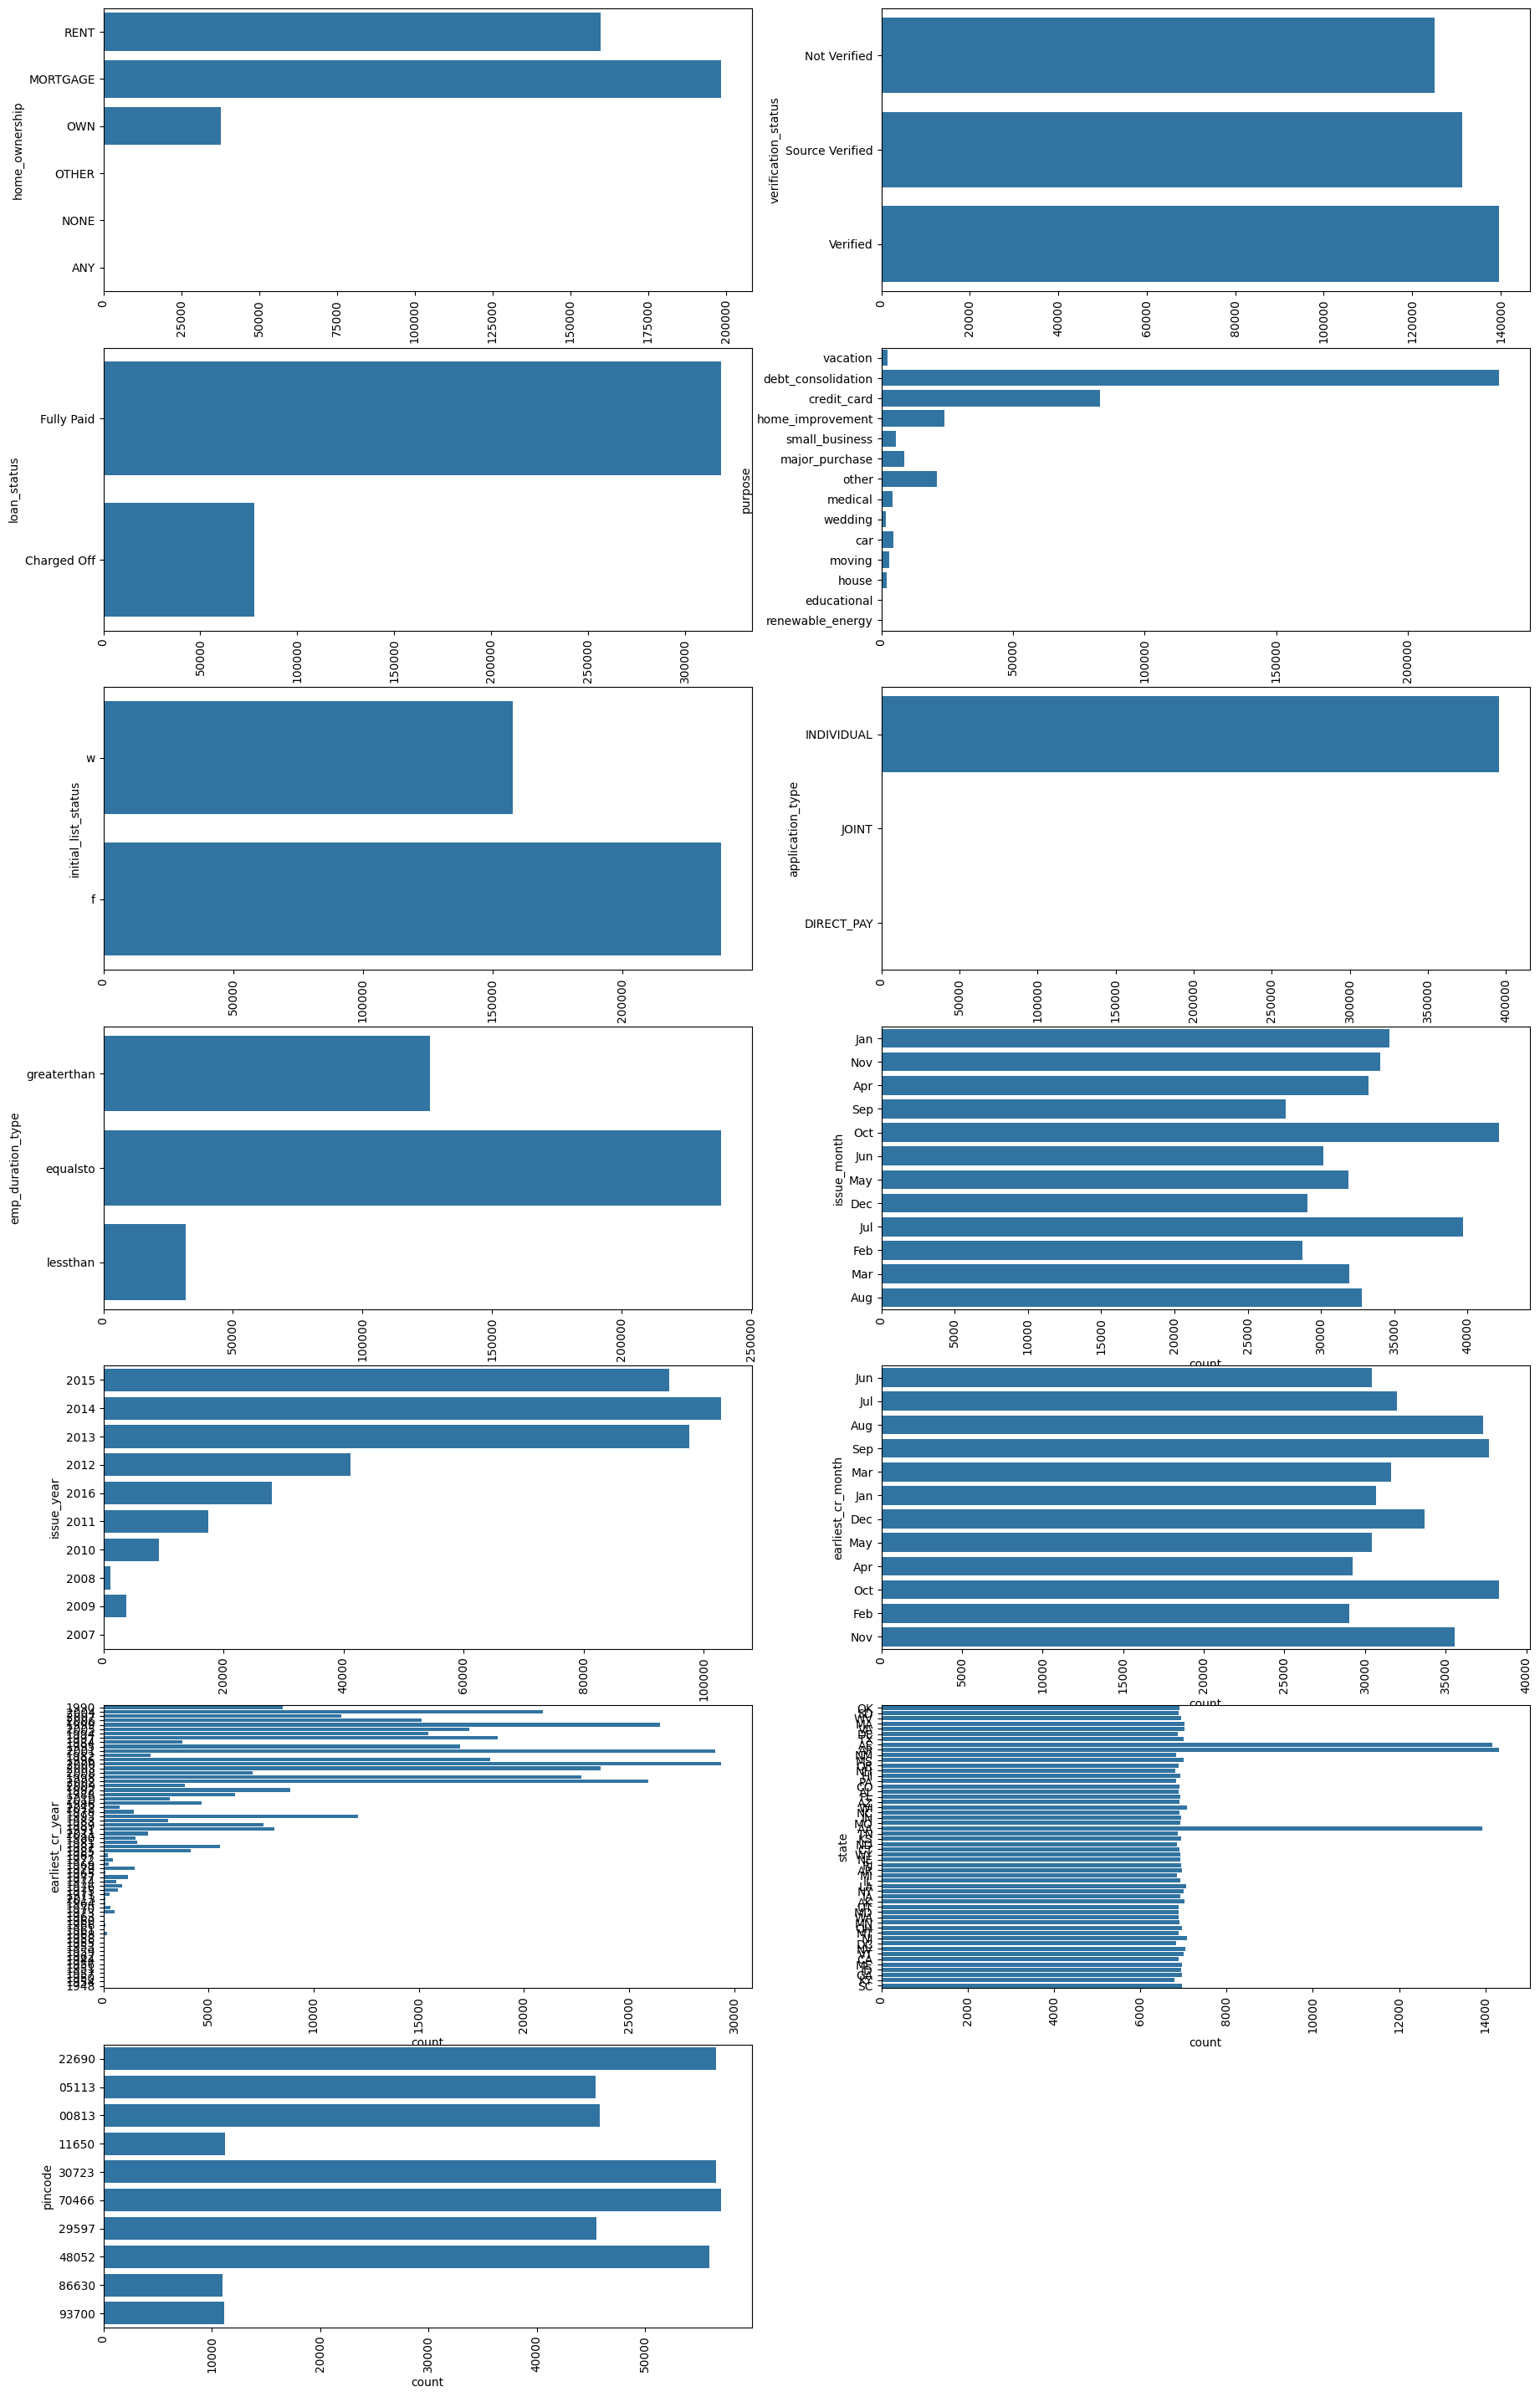

In [43]:
fig=plt.figure(figsize=(22,36)) # width*height
for ind_number, col_name in enumerate(df.describe(include="object").columns):
    if ind_number<13:
        plt.subplot(7,2,ind_number+1)
        sns.countplot(df[col_name], fill=True)
        plt.xticks(rotation=90)

In [44]:

print(
''' 
BIVARIATE Analysis: 

1. CONTINUOUS VS CONTINUOUS
2. CONTINUOUS VS CATEGORICAL
3. CATEGORICAL VS CATEGORICAL
''')


 
BIVARIATE Analysis: 

1. CONTINUOUS VS CONTINUOUS
2. CONTINUOUS VS CATEGORICAL
3. CATEGORICAL VS CATEGORICAL



<Axes: xlabel='int_rate', ylabel='loan_amnt'>

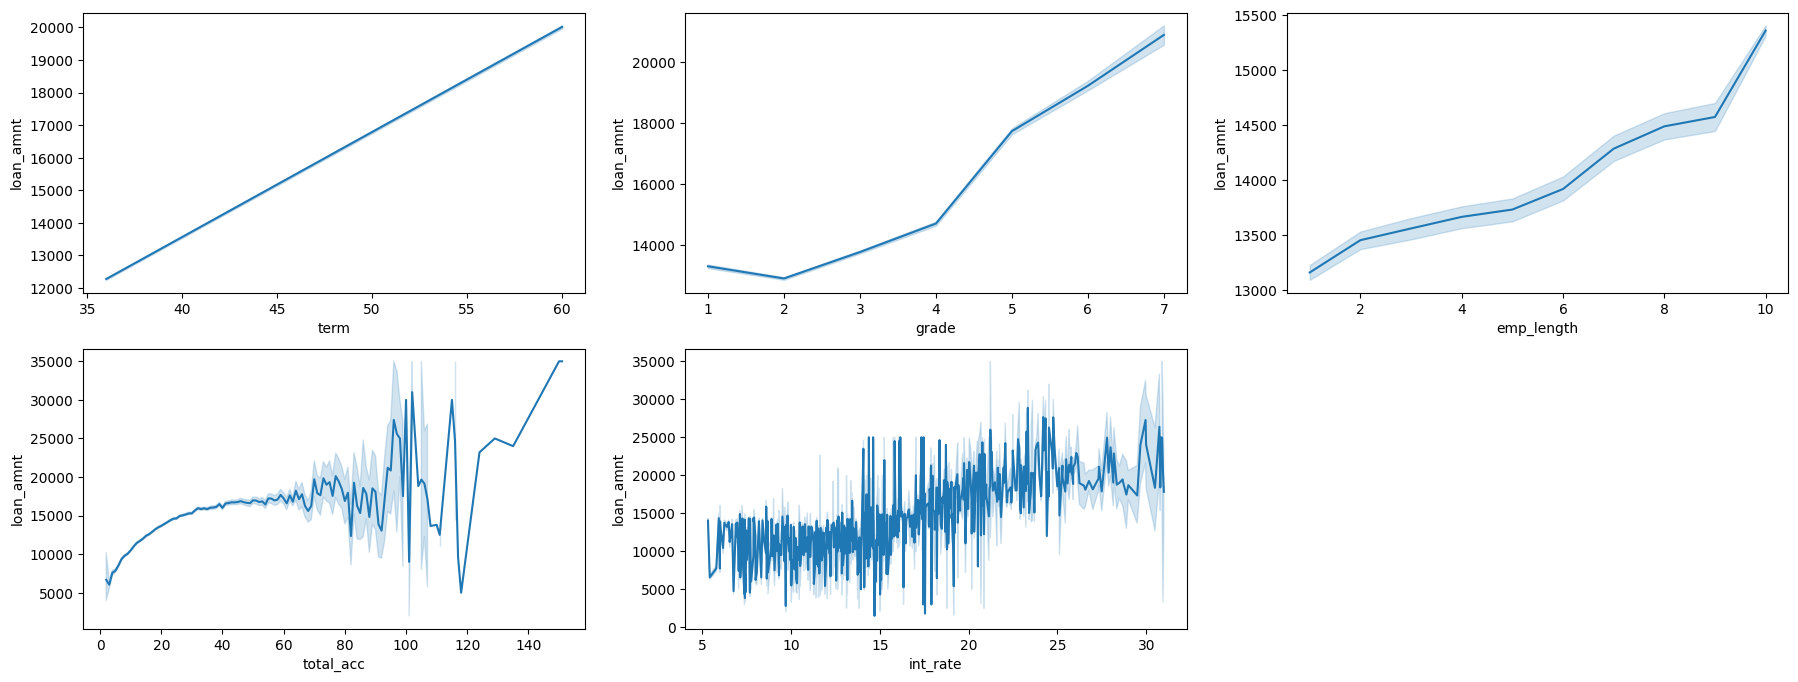

In [45]:
# 1. CONTINUOUS VS CONTINUOUS

fig=plt.figure(figsize=(22,8))

plt.subplot(2,3,1)
sns.lineplot(y='loan_amnt', x='term', data=df)

plt.subplot(2,3,2)
sns.lineplot(y='loan_amnt', x='grade', data=df)

plt.subplot(2,3,3)
sns.lineplot(y='loan_amnt', x='emp_length', data=df)

plt.subplot(2,3,4)
sns.lineplot(y='loan_amnt', x='total_acc', data=df)

plt.subplot(2,3,5)
sns.lineplot(y='loan_amnt', x='int_rate', data=df)

<Axes: xlabel='revol_bal', ylabel='loan_status'>

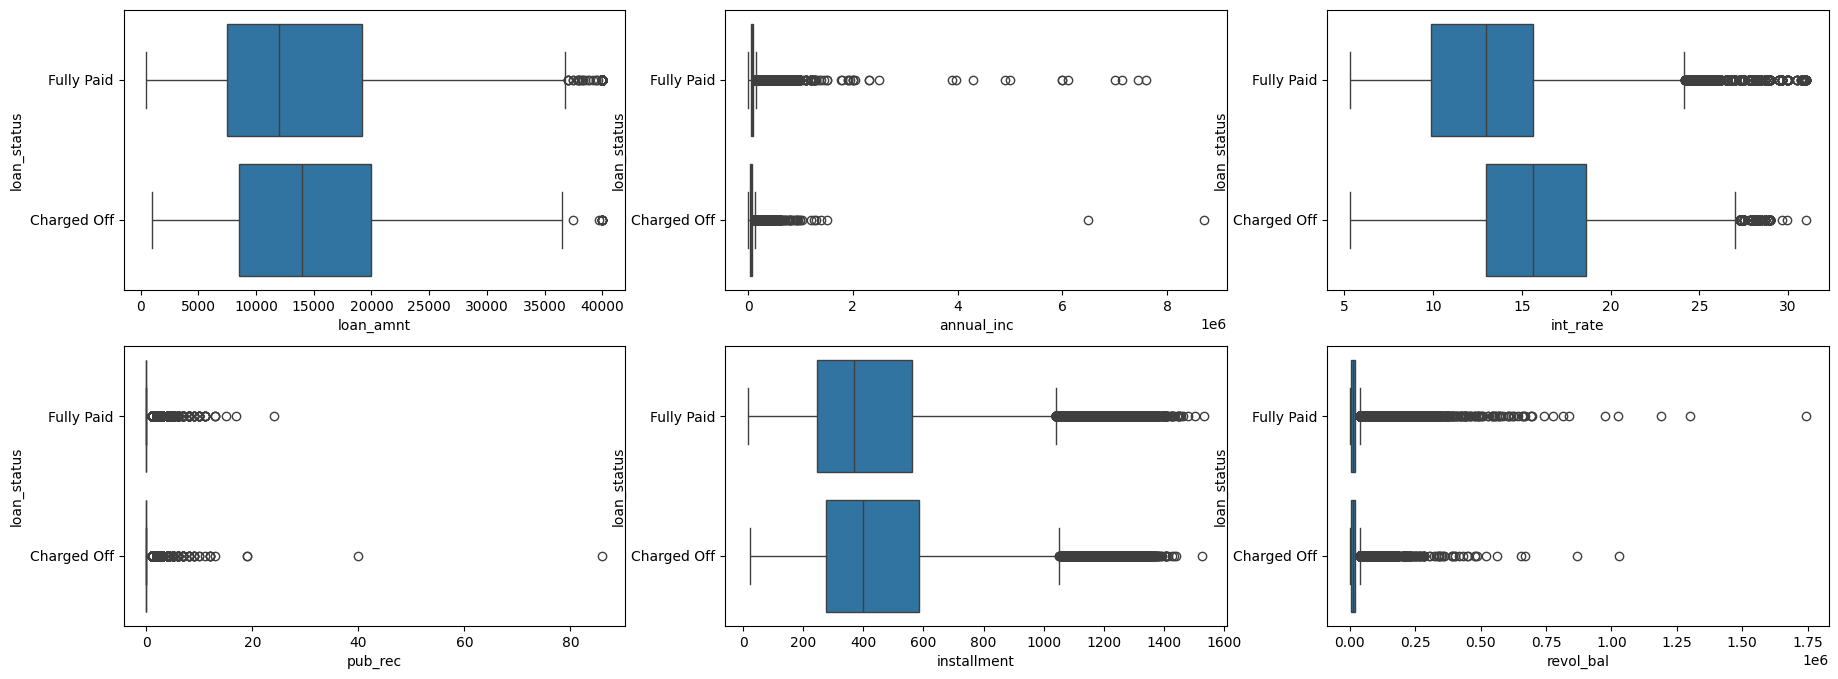

In [46]:
# 2. CONTINUOUS VS CATEGORICAL
fig=plt.figure(figsize=(22,8))

plt.subplot(2,3,1)
sns.boxplot(y='loan_status', x='loan_amnt', data=df)

plt.subplot(2,3,2)
sns.boxplot(y='loan_status', x='annual_inc', data=df)

plt.subplot(2,3,3)
sns.boxplot(y='loan_status', x='int_rate', data=df)

plt.subplot(2,3,4)
sns.boxplot(y='loan_status', x='pub_rec', data=df)

plt.subplot(2,3,5)
sns.boxplot(y='loan_status', x='installment', data=df)

plt.subplot(2,3,6)
sns.boxplot(y='loan_status', x='revol_bal', data=df)


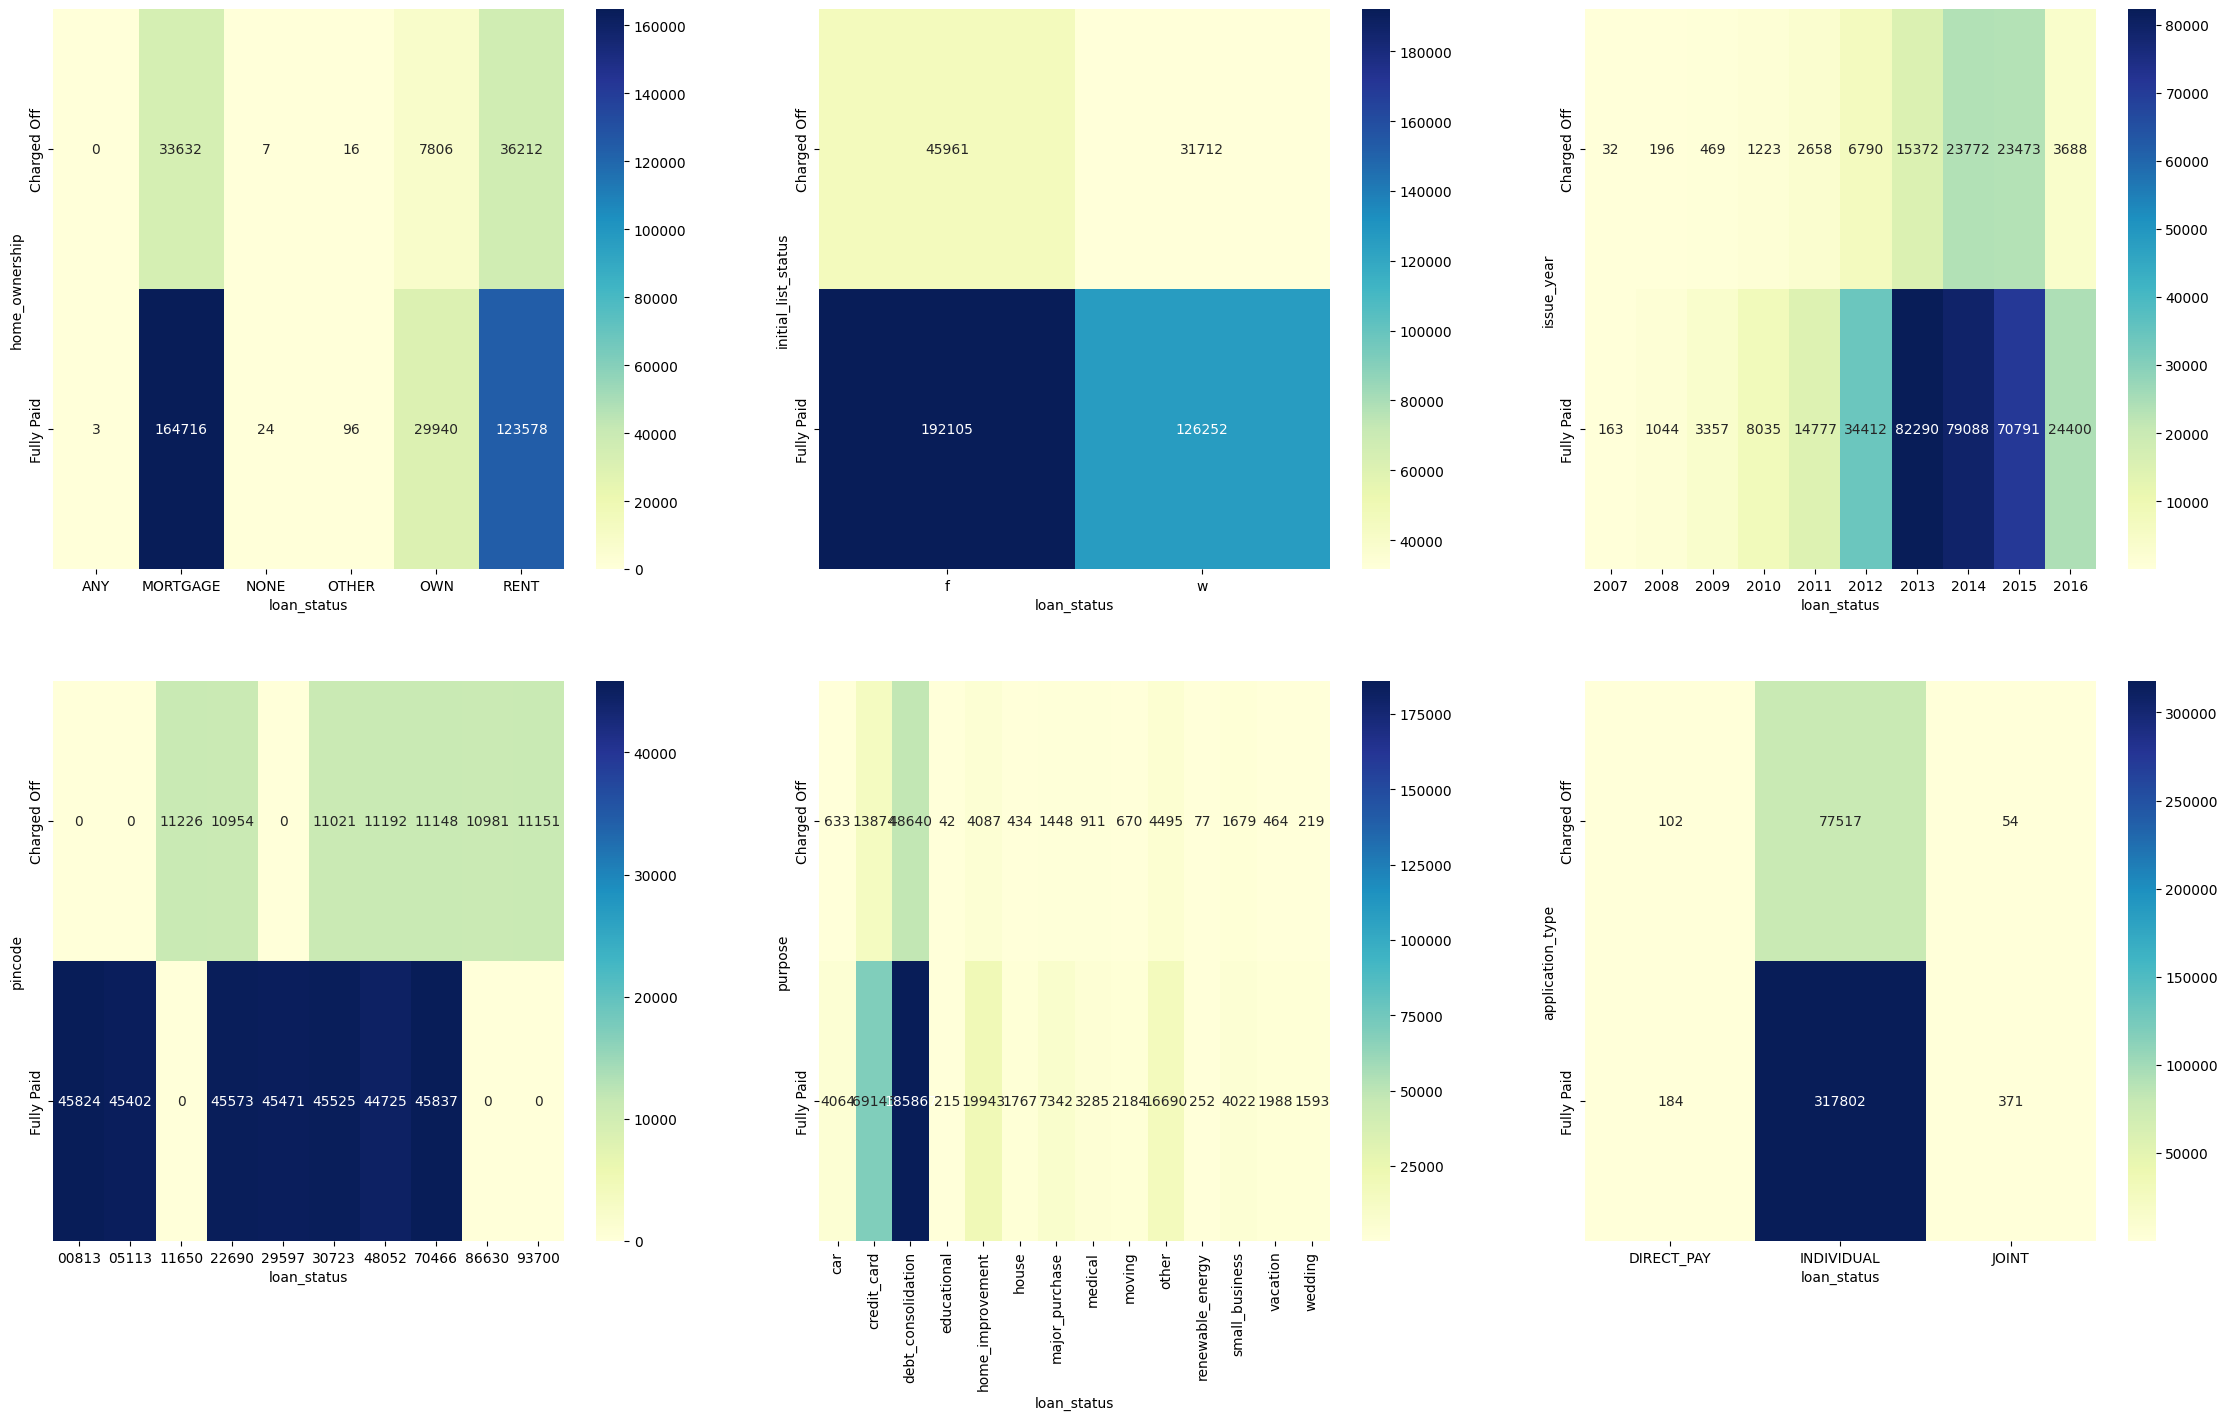

In [47]:
# 3. CATEGORICAL VS CATEGORICAL

categorical_col =  ["home_ownership", "initial_list_status", "issue_year", "pincode", "purpose", "application_type"]
fig=plt.figure(figsize=(28,16))
for ind_val, columns in enumerate(categorical_col):
    if ind_val<6:
        plt.subplot(2,3,ind_val+1)

        cross_tab = pd.crosstab(df["loan_status"], df[columns])
        sns.heatmap(cross_tab,annot=True, cmap="YlGnBu", fmt='d', cbar=True)

        # Set labels and title
        plt.xlabel('loan_status')
        plt.ylabel(columns)

        # Show the plot
        # plt.show()

## Data Preprocessing

### Duplicate and Missing value treatment

In [48]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,emp_duration_type,issue_month,issue_year,earliest_cr_month,earliest_cr_year,state,pincode
0,10000.0,36,11.44,329.48,2,4,10.0,RENT,117000.0,Not Verified,Fully Paid,vacation,26.24,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,greaterthan,Jan,2015,Jun,1990,OK,22690
1,8000.0,36,11.99,265.68,2,5,4.0,MORTGAGE,65000.0,Not Verified,Fully Paid,debt_consolidation,22.05,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,equalsto,Jan,2015,Jul,2004,SD,05113
2,15600.0,36,10.49,506.97,2,3,1.0,RENT,43057.0,Source Verified,Fully Paid,credit_card,12.79,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,lessthan,Jan,2015,Aug,2007,WV,05113
3,7200.0,36,6.49,220.65,1,2,6.0,RENT,54000.0,Not Verified,Fully Paid,credit_card,2.60,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,equalsto,Nov,2014,Sep,2006,MA,00813
4,24375.0,60,17.27,609.33,3,5,9.0,MORTGAGE,55000.0,Verified,Charged Off,credit_card,33.95,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,equalsto,Apr,2013,Mar,1999,VA,11650


In [49]:
df.shape

(396030, 29)

In [50]:
df.duplicated().sum()

0

In [51]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
loan_status                 0
purpose                     0
dti                         0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
emp_duration_type           0
issue_month                 0
issue_year                  0
earliest_cr_month           0
earliest_cr_year            0
state                       0
pincode                     0
dtype: int64

In [52]:
df.describe()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,377729.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,41.698053,13.639400,431.849698,2.822337,2.971798,6.022566,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,10.212038,4.472157,250.727790,1.333809,1.406773,3.517094,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,36.000000,5.320000,16.080000,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,36.000000,10.490000,250.330000,2.000000,2.000000,3.000000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,36.000000,13.330000,375.430000,3.000000,3.000000,6.000000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,36.000000,16.490000,567.300000,4.000000,4.000000,10.000000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,60.000000,30.990000,1533.810000,7.000000,5.000000,10.000000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [53]:
df.describe(include="object")

,home_ownership,verification_status,loan_status,purpose,initial_list_status,application_type,emp_duration_type,issue_month,issue_year,earliest_cr_month,earliest_cr_year,state,pincode
count,396030,396030,396030,396030,396030,396030,396030,396030,396030,396030,396030,396030,396030
unique,6,3,2,14,2,3,3,12,10,12,65,54,10
top,MORTGAGE,Verified,Fully Paid,debt_consolidation,f,INDIVIDUAL,equalsto,Oct,2014,Oct,2000,AP,70466
freq,198348,139563,318357,234507,238066,395319,238264,42130,102860,38291,29366,14308,56985


In [59]:
from sklearn.impute import KNNImputer

# Handling missing emp_length
# Identify numeric and categorical columns
# Instead of selecting all numeric columns, seting as per business understanding
# numeric_columns = df.select_dtypes(include='number').columns
numeric_columns = ["loan_amnt", "annual_inc", "emp_length", "mort_acc"]

# Extract the numeric part of the DataFrame
df_numeric = df[numeric_columns]

# Impute missing values in the numeric part using KNNImputer
knn_imputer = KNNImputer(n_neighbors=10)
df_numeric_imputed = pd.DataFrame(knn_imputer.fit_transform(df_numeric), columns=numeric_columns)

# Combine the imputed numeric part with the original categorical part
df = pd.concat([df.drop(columns=numeric_columns), df_numeric_imputed], axis=1)

df.isnull().sum()

term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
verification_status       0
loan_status               0
purpose                   0
dti                       0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
pub_rec_bankruptcies    535
emp_duration_type         0
issue_month               0
issue_year                0
earliest_cr_month         0
earliest_cr_year          0
state                     0
pincode                   0
loan_amnt                 0
annual_inc                0
emp_length                0
mort_acc                  0
dtype: int64

In [60]:
# Handling missing revol_util

# Identify numeric and categorical columns
# Instead of selecting all numeric columns, seting as per business understanding
# numeric_columns = df.select_dtypes(include='number').columns
numeric_columns = ["revol_bal", "total_acc", "revol_util"]

# Extract the numeric part of the DataFrame
df_numeric = df[numeric_columns]

# Impute missing values in the numeric part using KNNImputer
knn_imputer = KNNImputer(n_neighbors=10)
df_numeric_imputed = pd.DataFrame(knn_imputer.fit_transform(df_numeric), columns=numeric_columns)

# Combine the imputed numeric part with the original categorical part
df = pd.concat([df.drop(columns=numeric_columns), df_numeric_imputed], axis=1)

df.isnull().sum()

term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
verification_status       0
loan_status               0
purpose                   0
dti                       0
open_acc                  0
pub_rec                   0
initial_list_status       0
application_type          0
pub_rec_bankruptcies    535
emp_duration_type         0
issue_month               0
issue_year                0
earliest_cr_month         0
earliest_cr_year          0
state                     0
pincode                   0
loan_amnt                 0
annual_inc                0
emp_length                0
mort_acc                  0
revol_bal                 0
total_acc                 0
revol_util                0
dtype: int64

In [61]:
# Handling missing pub_rec_bankruptcies
## Dropping pub_rec_bankruptcies as does find any correlation with other feature.
df.dropna(inplace=True)
df.isnull().sum()

term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
verification_status     0
loan_status             0
purpose                 0
dti                     0
open_acc                0
pub_rec                 0
initial_list_status     0
application_type        0
pub_rec_bankruptcies    0
emp_duration_type       0
issue_month             0
issue_year              0
earliest_cr_month       0
earliest_cr_year        0
state                   0
pincode                 0
loan_amnt               0
annual_inc              0
emp_length              0
mort_acc                0
revol_bal               0
total_acc               0
revol_util              0
dtype: int64

In [62]:
df.to_csv("dataset/df_processed_phase1.csv", index=False)

### Outlier Treatment

In [217]:
df = pd.read_csv("dataset/df_processed_phase1.csv")
df.head()

,term,int_rate,installment,grade,sub_grade,home_ownership,verification_status,loan_status,purpose,dti,open_acc,pub_rec,initial_list_status,application_type,pub_rec_bankruptcies,emp_duration_type,issue_month,issue_year,earliest_cr_month,earliest_cr_year,state,pincode,loan_amnt,annual_inc,emp_length,mort_acc,revol_bal,total_acc,revol_util
0,36,11.44,329.48,2,4,RENT,Not Verified,Fully Paid,vacation,26.24,16.0,0.0,w,INDIVIDUAL,0.0,greaterthan,Jan,2015,Jun,1990,OK,22690,10000.0,117000.0,10.0,0.0,36369.0,25.0,41.8
1,36,11.99,265.68,2,5,MORTGAGE,Not Verified,Fully Paid,debt_consolidation,22.05,17.0,0.0,f,INDIVIDUAL,0.0,equalsto,Jan,2015,Jul,2004,SD,5113,8000.0,65000.0,4.0,3.0,20131.0,27.0,53.3
2,36,10.49,506.97,2,3,RENT,Source Verified,Fully Paid,credit_card,12.79,13.0,0.0,f,INDIVIDUAL,0.0,lessthan,Jan,2015,Aug,2007,WV,5113,15600.0,43057.0,1.0,0.0,11987.0,26.0,92.2
3,36,6.49,220.65,1,2,RENT,Not Verified,Fully Paid,credit_card,2.60,6.0,0.0,f,INDIVIDUAL,0.0,equalsto,Nov,2014,Sep,2006,MA,813,7200.0,54000.0,6.0,0.0,5472.0,13.0,21.5
4,60,17.27,609.33,3,5,MORTGAGE,Verified,Charged Off,credit_card,33.95,13.0,0.0,f,INDIVIDUAL,0.0,equalsto,Apr,2013,Mar,1999,VA,11650,24375.0,55000.0,9.0,1.0,24584.0,43.0,69.8


In [218]:
df.shape

(395495, 29)

In [219]:
df.isnull().sum()

term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
verification_status     0
loan_status             0
purpose                 0
dti                     0
open_acc                0
pub_rec                 0
initial_list_status     0
application_type        0
pub_rec_bankruptcies    0
emp_duration_type       0
issue_month             0
issue_year              0
earliest_cr_month       0
earliest_cr_year        0
state                   0
pincode                 0
loan_amnt               0
annual_inc              0
emp_length              0
mort_acc                0
revol_bal               0
total_acc               0
revol_util              0
dtype: int64

In [220]:
df.describe().columns

Index(['term', 'int_rate', 'installment', 'grade', 'sub_grade', 'dti',
       'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'issue_year',
       'earliest_cr_year', 'pincode', 'loan_amnt', 'annual_inc', 'emp_length',
       'mort_acc', 'revol_bal', 'total_acc', 'revol_util'],
      dtype='object')

In [221]:
df.describe()

,term,int_rate,installment,grade,sub_grade,dti,open_acc,pub_rec,pub_rec_bankruptcies,issue_year,earliest_cr_year,pincode,loan_amnt,annual_inc,emp_length,mort_acc,revol_bal,total_acc,revol_util
count,395495.000000,395495.000000,395495.000000,395495.000000,395495.000000,395495.000000,395495.000000,395495.000000,395495.000000,395495.000000,395495.000000,395495.000000,395495.000000,3.954950e+05,395495.000000,395495.000000,3.954950e+05,395495.000000,395495.000000
mean,41.705761,13.643530,432.007574,2.822620,2.971926,17.388523,11.313754,0.178384,0.121648,2013.637164,1997.861485,34001.141289,14119.801451,7.420826e+04,5.994772,1.801282,1.584730e+04,25.422771,53.779010
std,10.216791,4.473081,250.740725,1.333844,1.406788,18.027900,5.136860,0.530955,0.356174,1.466190,7.198201,25607.536565,8358.256241,6.157137e+04,3.452760,2.067734,2.059394e+04,11.885544,24.465139
min,36.000000,5.320000,16.080000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,1944.000000,813.000000,500.000000,0.000000e+00,1.000000,0.000000,0.000000e+00,2.000000,0.000000
25%,36.000000,10.490000,250.330000,2.000000,2.000000,11.295000,8.000000,0.000000,0.000000,2013.000000,1994.000000,11650.000000,8000.000000,4.500000e+04,3.000000,0.000000,6.030000e+03,17.000000,35.800000
50%,36.000000,13.330000,375.450000,3.000000,3.000000,16.910000,10.000000,0.000000,0.000000,2014.000000,1999.000000,29597.000000,12000.000000,6.400000e+04,6.000000,1.000000,1.118400e+04,24.000000,54.800000
75%,36.000000,16.550000,567.730000,4.000000,4.000000,22.990000,14.000000,0.000000,0.000000,2015.000000,2003.000000,48052.000000,20000.000000,9.000000e+04,10.000000,3.000000,1.962200e+04,32.000000,72.900000
max,60.000000,30.990000,1533.810000,7.000000,5.000000,9999.000000,90.000000,86.000000,8.000000,2016.000000,2013.000000,93700.000000,40000.000000,8.706582e+06,10.000000,34.000000,1.743266e+06,151.000000,892.300000


In [222]:
numeric_col1 = ["open_acc", "open_acc", "total_acc", "revol_util", "dti"]
numeric_col4 = ["annual_inc", "revol_bal"]

<Axes: xlabel='loan_amnt', ylabel='Density'>

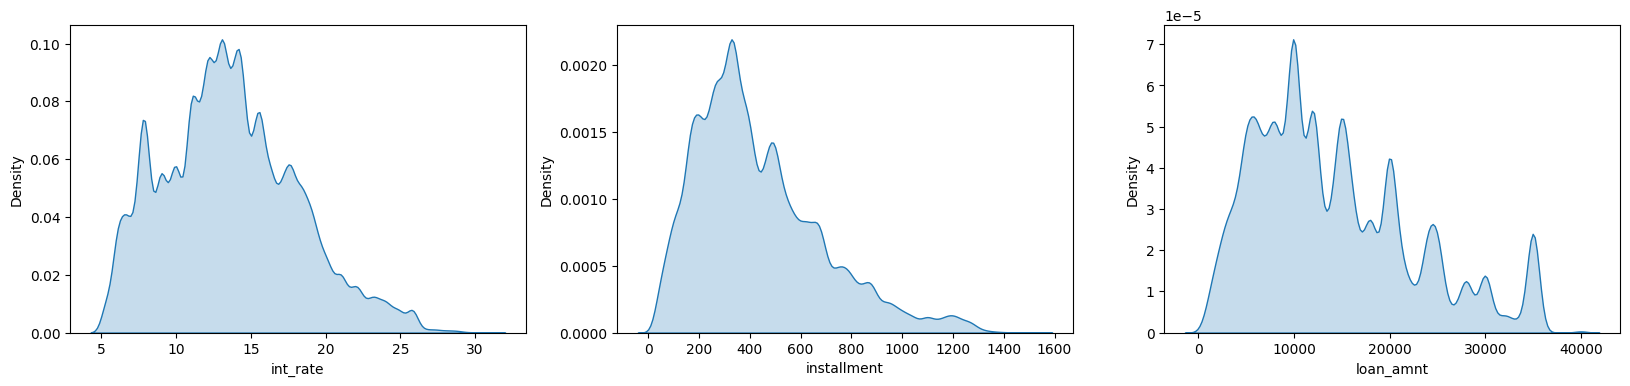

In [223]:
# 1. int_rate, installment, loan_amnt doesn't seem to have big variation in values, looks it's okay not to consider them in outliers detection

fig=plt.figure(figsize=(20,4))

plt.subplot(1,3,1)
sns.kdeplot(df["int_rate"], fill=True)

plt.subplot(1,3,2)
sns.kdeplot(df["installment"], fill=True)

plt.subplot(1,3,3)
sns.kdeplot(df["loan_amnt"], fill=True)

<Axes: xlabel='term', ylabel='Density'>

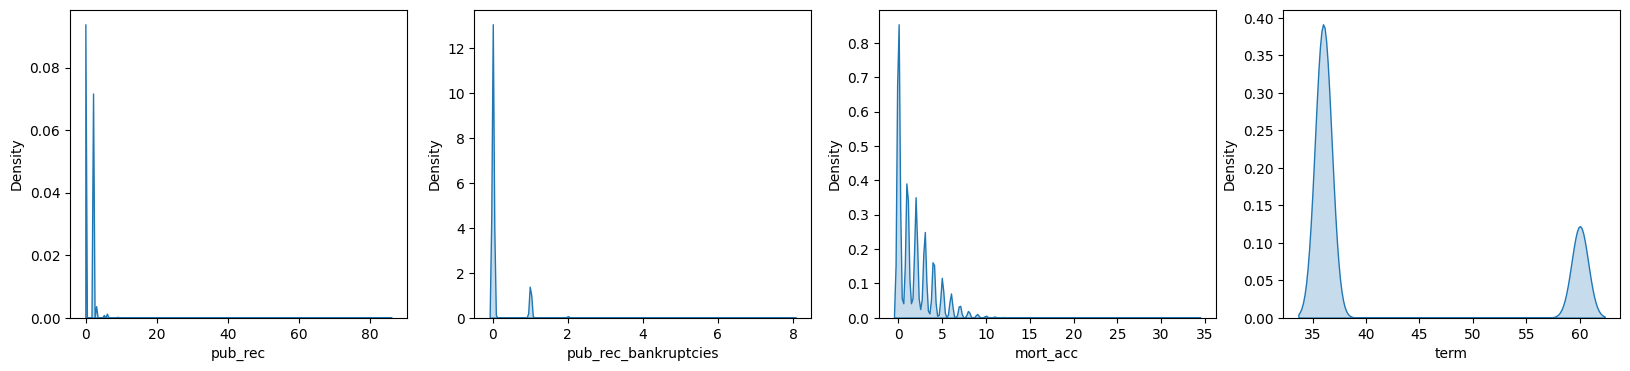

In [224]:
# 2. Few Features have outside values but we can not consider them as outliears, it is better to create some flag(binary flag at some condition) for them as they may behave like important values in model understanding at the time of training.
# Like pub_rec, pub_rec_bankruptcies, mort_acc.

fig=plt.figure(figsize=(20,4))

plt.subplot(1,4,1)
sns.kdeplot(df["pub_rec"], fill=True)

plt.subplot(1,4,2)
sns.kdeplot(df["pub_rec_bankruptcies"], fill=True)

plt.subplot(1,4,3)
sns.kdeplot(df["mort_acc"], fill=True)

plt.subplot(1,4,4)
sns.kdeplot(df["term"], fill=True)

In [225]:
df["pub_rec"]= df["pub_rec"].apply(lambda x: "good" if x==0 else "bad")
df["pub_rec_bankruptcies"]= df["pub_rec_bankruptcies"].apply(lambda x: "good" if x==0 else "bad")
df["mort_acc"]= df["mort_acc"].apply(lambda x: "good" if x==0 else "bad")
df["term"]= df["term"].apply(lambda x: "36" if x==36 else "60")

In [226]:
df.describe(include="object")

,term,home_ownership,verification_status,loan_status,purpose,pub_rec,initial_list_status,application_type,pub_rec_bankruptcies,emp_duration_type,issue_month,earliest_cr_month,state,mort_acc
count,395495,395495,395495,395495,395495,395495,395495,395495,395495,395495,395495,395495,395495,395495
unique,2,6,3,2,14,2,2,3,2,3,12,12,54,2
top,36,MORTGAGE,Verified,Fully Paid,debt_consolidation,good,f,INDIVIDUAL,good,equalsto,Oct,Oct,AP,bad
freq,301470,198151,139562,317909,234292,337755,237531,394784,350380,237949,42097,38248,14280,255287


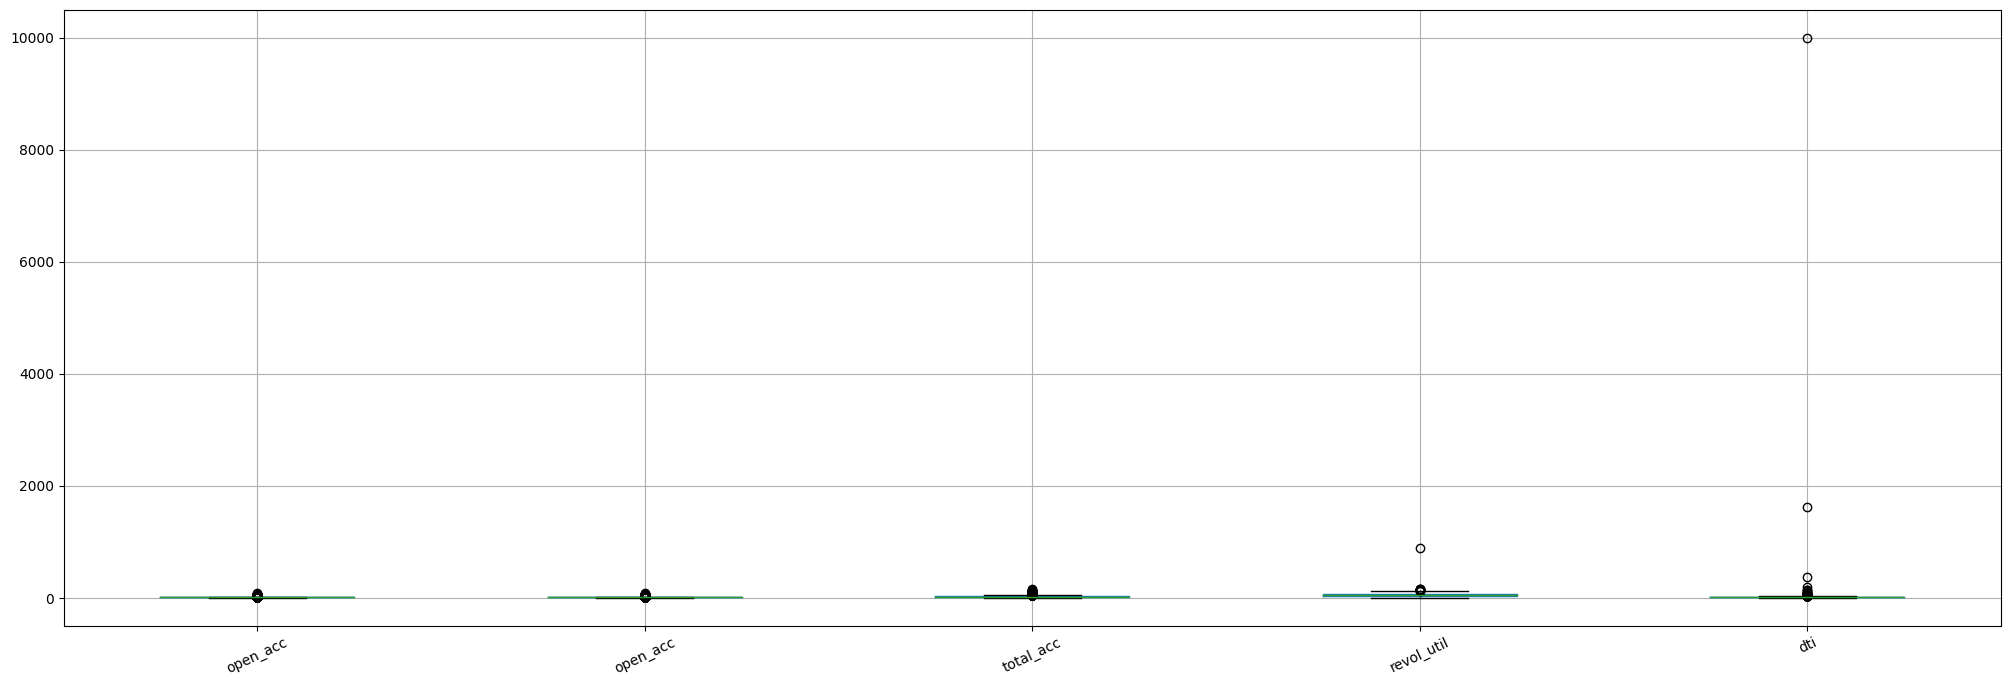

In [227]:
df[numeric_col1].boxplot(rot=25, figsize=(25,8))
plt.show()

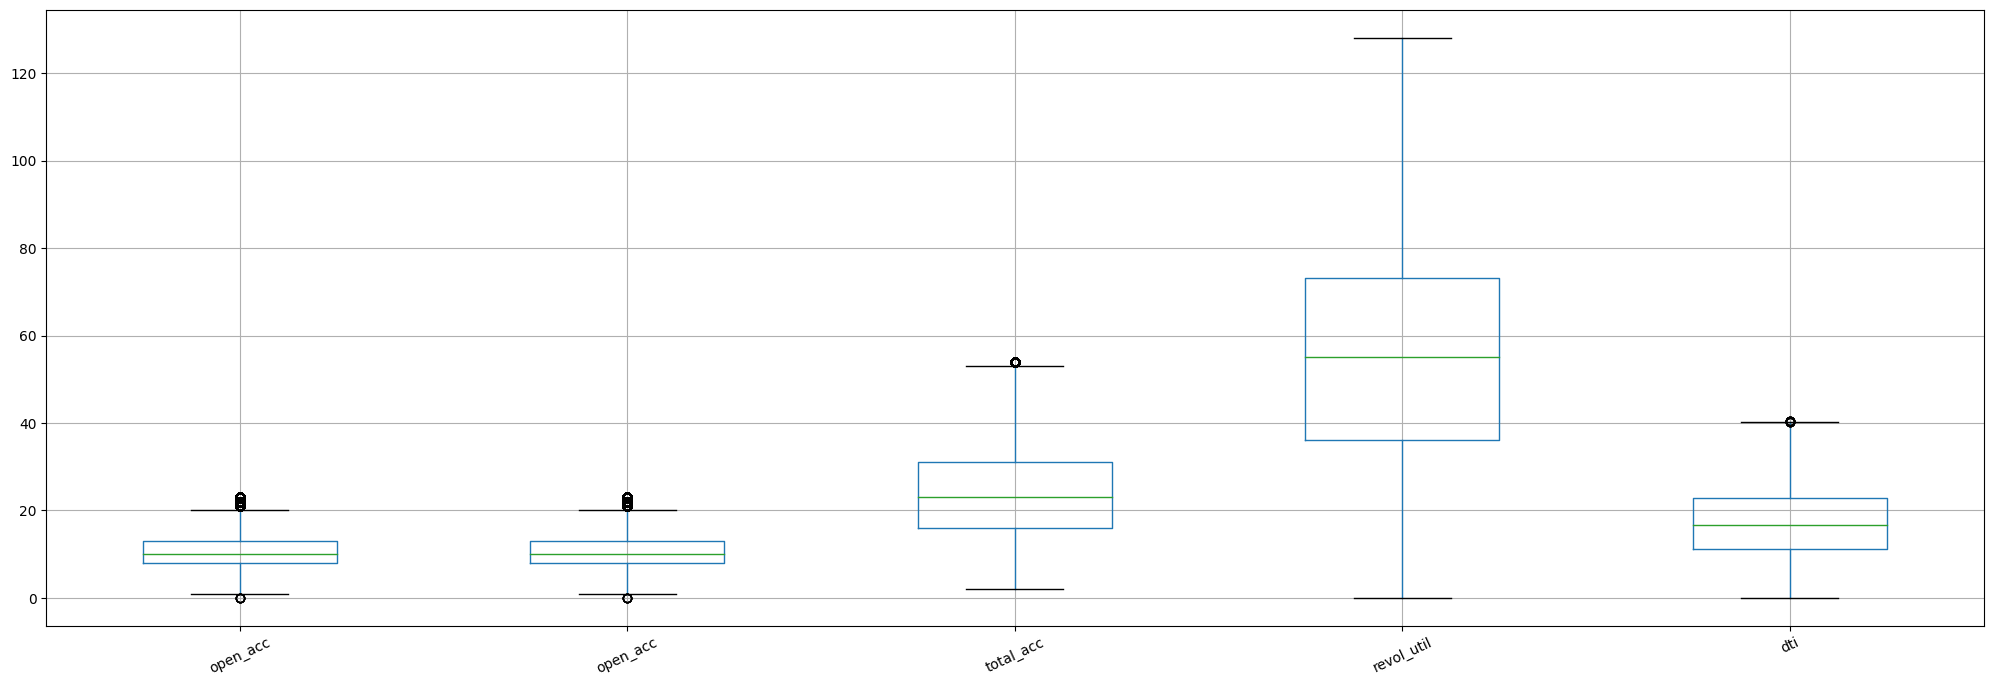

In [228]:
Q1 = df[numeric_col1].quantile(0.25)
Q3 = df[numeric_col1].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[numeric_col1] < (Q1 - 1.5 * IQR)) | (df[numeric_col1] > (Q3 + 1.5 * IQR))).any(axis=1)]
df = df.reset_index(drop=True)

df[numeric_col1].boxplot(rot=25, figsize=(25,8))
plt.show()

In [229]:
df.shape

(379612, 29)

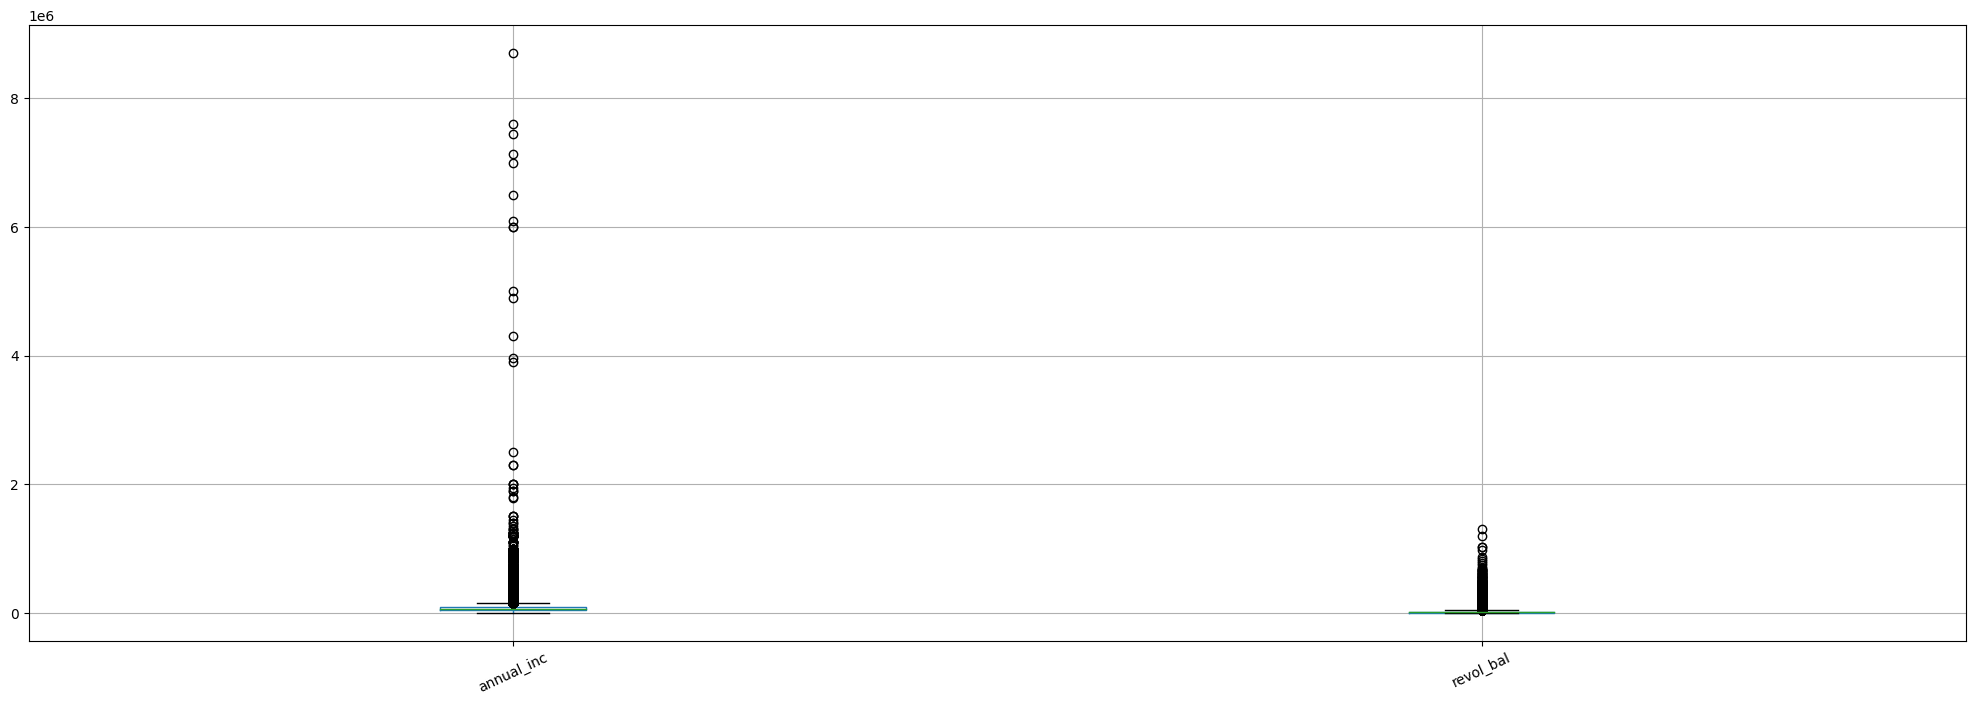

In [230]:
df[numeric_col4].boxplot(rot=25, figsize=(25,8))
plt.show()

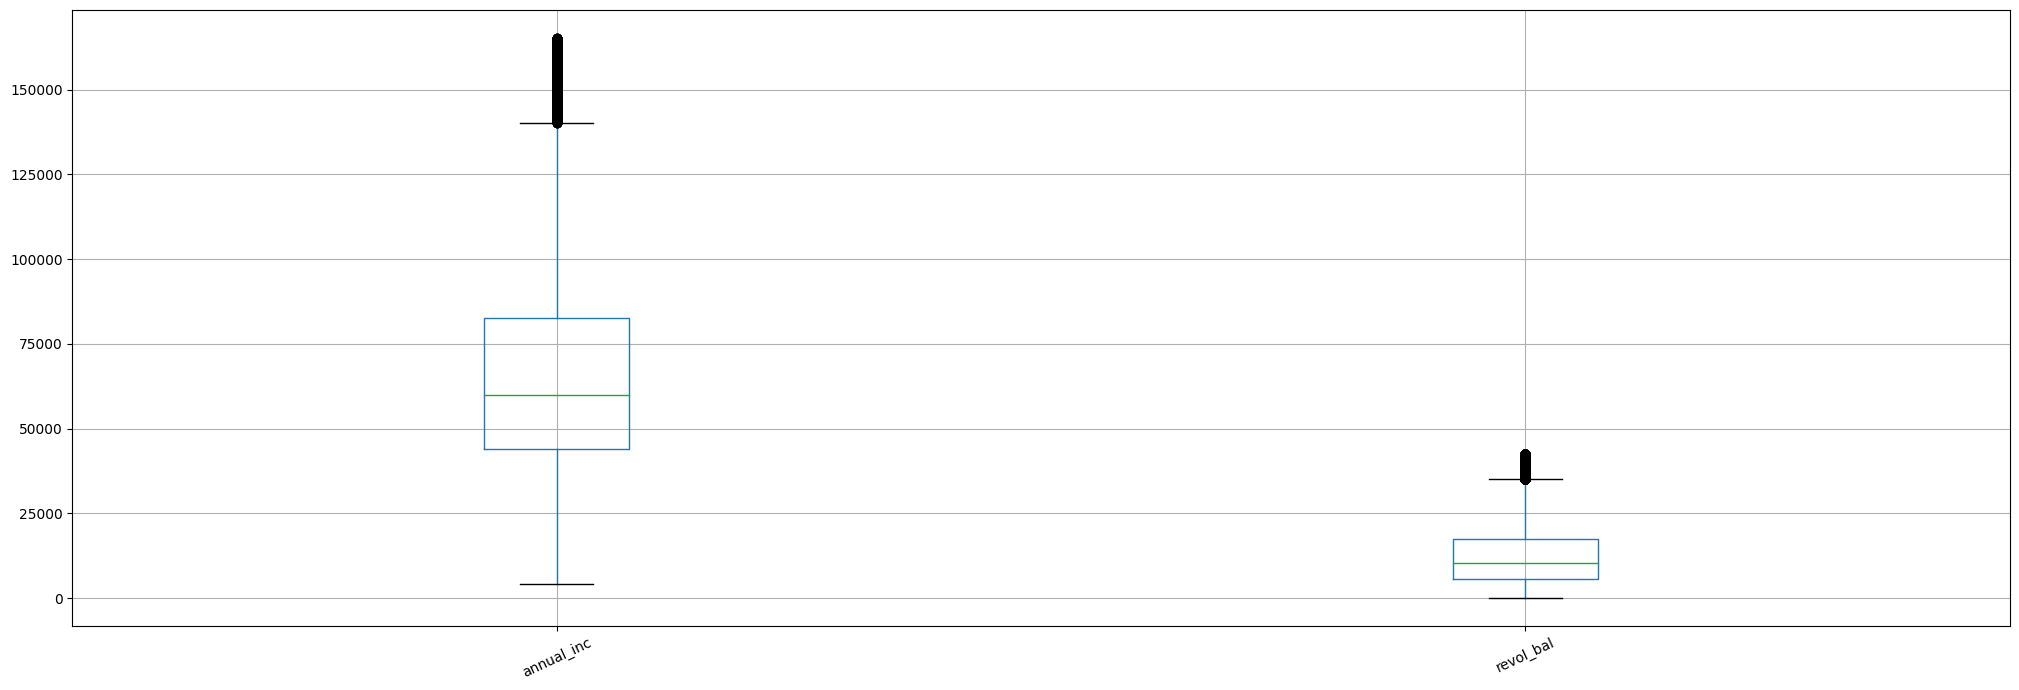

In [231]:
Q1 = df[numeric_col4].quantile(0.25)
Q3 = df[numeric_col4].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[numeric_col4] < (Q1 - 1.75 * IQR)) | (df[numeric_col4] > (Q3 + 1.75 * IQR))).any(axis=1)]
df = df.reset_index(drop=True)

df[numeric_col4].boxplot(rot=25, figsize=(25,8))
plt.show()

In [232]:
# Selecting INDIVIDUAL application type, as we are dealing with PERSONNEL LOAN

df = df[df["application_type"] == "INDIVIDUAL"]
df.drop(columns=["application_type"], axis=1, inplace=True)
df.shape

(353446, 28)

In [233]:
df.describe(include="object")

,term,home_ownership,verification_status,loan_status,purpose,pub_rec,initial_list_status,pub_rec_bankruptcies,emp_duration_type,issue_month,earliest_cr_month,state,mort_acc
count,353446,353446,353446,353446,353446,353446,353446,353446,353446,353446,353446,353446,353446
unique,2,6,3,2,14,2,2,2,3,12,12,54,2
top,36,MORTGAGE,Verified,Fully Paid,debt_consolidation,good,f,good,equalsto,Oct,Oct,AP,bad
freq,272182,169856,120801,283519,210407,299877,215053,311009,215327,37697,34297,12757,220672


### Data Preparation for modelling
* Scaling Numerical Columns

In [236]:
df.describe()

,int_rate,installment,grade,sub_grade,dti,open_acc,issue_year,earliest_cr_year,pincode,loan_amnt,annual_inc,emp_length,revol_bal,total_acc,revol_util
count,353446.000000,353446.000000,353446.000000,353446.000000,353446.000000,353446.000000,353446.000000,353446.000000,353446.000000,353446.000000,353446.000000,353446.000000,353446.000000,353446.000000,353446.000000
mean,13.661327,411.192627,2.820867,2.972726,17.234207,10.654128,2013.598185,1998.242088,34058.142556,13407.138431,65994.235085,5.947352,12611.762060,23.890099,53.588887
std,4.432925,234.679481,1.322015,1.405934,8.020701,4.283042,1.464845,7.073114,25631.146185,7867.213303,29700.388927,3.442470,9112.298636,10.331321,24.305051
min,5.320000,19.870000,1.000000,1.000000,0.000000,0.000000,2007.000000,1944.000000,813.000000,700.000000,4000.000000,1.000000,0.000000,2.000000,0.000000
25%,10.640000,242.630000,2.000000,2.000000,11.260000,7.000000,2013.000000,1995.000000,11650.000000,7500.000000,44100.000000,3.000000,5700.000000,16.000000,35.800000
50%,13.330000,361.380000,3.000000,3.000000,16.800000,10.000000,2014.000000,2000.000000,29597.000000,12000.000000,60000.000000,6.000000,10382.000000,23.000000,54.600000
75%,16.490000,535.490000,4.000000,4.000000,22.800000,13.000000,2015.000000,2003.000000,48052.000000,18000.000000,82567.500000,10.000000,17476.000000,31.000000,72.500000
max,30.990000,1479.490000,7.000000,5.000000,39.990000,23.000000,2016.000000,2013.000000,93700.000000,40000.000000,165300.000000,10.000000,42465.000000,54.000000,128.100000


In [237]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler

numeric_columns = df.describe().columns
scaler = StandardScaler()
scaler.fit(df[numeric_columns])
df[numeric_columns] = scaler.transform(df[numeric_columns])

In [239]:
df.head()

,term,int_rate,installment,grade,sub_grade,home_ownership,verification_status,loan_status,purpose,dti,open_acc,pub_rec,initial_list_status,pub_rec_bankruptcies,emp_duration_type,issue_month,issue_year,earliest_cr_month,earliest_cr_year,state,pincode,loan_amnt,annual_inc,emp_length,mort_acc,revol_bal,total_acc,revol_util
0,36,-0.501098,-0.348189,-0.620922,0.730671,RENT,Not Verified,Fully Paid,vacation,1.122820,1.248150,good,w,good,greaterthan,Jan,0.956973,Jun,-1.165272,OK,-0.443529,-0.433081,1.717346,1.177252,good,2.607166,0.107431,-0.485039
1,36,-0.377026,-0.620049,-0.620922,1.441943,MORTGAGE,Not Verified,Fully Paid,debt_consolidation,0.600421,1.481629,good,f,good,equalsto,Jan,0.956973,Jul,0.814057,SD,-1.129297,-0.687301,-0.033476,-0.565685,bad,0.825176,0.301017,-0.011886
2,36,-0.715404,0.408121,-0.620922,0.019399,RENT,Source Verified,Fully Paid,credit_card,-0.554093,0.547712,good,f,good,lessthan,Jan,0.956973,Aug,1.238199,WV,-1.129297,0.278735,-0.772288,-1.437154,good,-0.068563,0.204224,1.588607
3,36,-1.617744,-0.811928,-1.377344,-0.691873,RENT,Not Verified,Fully Paid,credit_card,-1.824557,-1.086642,good,f,good,equalsto,Nov,0.274306,Sep,1.096819,MA,-1.297062,-0.788989,-0.403842,0.015294,good,-0.783531,-1.054087,-1.320258
4,60,0.814062,0.844290,0.135500,1.441943,MORTGAGE,Verified,Charged Off,credit_card,2.084084,0.547712,good,f,good,equalsto,Apr,-0.408361,Mar,0.107154,VA,-0.874256,1.394125,-0.370172,0.886762,bad,1.313857,1.849708,0.666986


* Encoding categorical features

1. For Label Encoding: term, loan_status, pub_rec, initial_list_status,pub_rec_bankruptcies, mort_acc

2. For OHE: verification_status, emp_duration_type

3. For Target Encoding: home_ownership, purpose, issue_month, earliest_cr_month, state


In [240]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
labelencoderlist = ["term", "loan_status", "pub_rec", "initial_list_status", "pub_rec_bankruptcies", "mort_acc"]

# Apply label encoding to each column
for column in labelencoderlist:
    df[column] = LabelEncoder().fit_transform(df[column])

In [241]:
# OHE
ohe_list = ["verification_status", "emp_duration_type"]
df = pd.get_dummies(df,columns=ohe_list)

In [242]:
ohe_encoded = ["verification_status_Not Verified", "verification_status_Source Verified", "verification_status_Verified"
               ,"emp_duration_type_equalsto", "emp_duration_type_greaterthan", "emp_duration_type_lessthan"]

for cols in ohe_encoded:
    df[cols] = df[cols].astype(int)

In [243]:
df.head()

,term,int_rate,installment,grade,sub_grade,home_ownership,loan_status,purpose,dti,open_acc,pub_rec,initial_list_status,pub_rec_bankruptcies,issue_month,issue_year,earliest_cr_month,earliest_cr_year,state,pincode,loan_amnt,annual_inc,emp_length,mort_acc,revol_bal,total_acc,revol_util,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,emp_duration_type_equalsto,emp_duration_type_greaterthan,emp_duration_type_lessthan
0,0,-0.501098,-0.348189,-0.620922,0.730671,RENT,1,vacation,1.122820,1.248150,1,1,1,Jan,0.956973,Jun,-1.165272,OK,-0.443529,-0.433081,1.717346,1.177252,1,2.607166,0.107431,-0.485039,1,0,0,0,1,0
1,0,-0.377026,-0.620049,-0.620922,1.441943,MORTGAGE,1,debt_consolidation,0.600421,1.481629,1,0,1,Jan,0.956973,Jul,0.814057,SD,-1.129297,-0.687301,-0.033476,-0.565685,0,0.825176,0.301017,-0.011886,1,0,0,1,0,0
2,0,-0.715404,0.408121,-0.620922,0.019399,RENT,1,credit_card,-0.554093,0.547712,1,0,1,Jan,0.956973,Aug,1.238199,WV,-1.129297,0.278735,-0.772288,-1.437154,1,-0.068563,0.204224,1.588607,0,1,0,0,0,1
3,0,-1.617744,-0.811928,-1.377344,-0.691873,RENT,1,credit_card,-1.824557,-1.086642,1,0,1,Nov,0.274306,Sep,1.096819,MA,-1.297062,-0.788989,-0.403842,0.015294,1,-0.783531,-1.054087,-1.320258,1,0,0,1,0,0
4,1,0.814062,0.844290,0.135500,1.441943,MORTGAGE,0,credit_card,2.084084,0.547712,1,0,1,Apr,-0.408361,Mar,0.107154,VA,-0.874256,1.394125,-0.370172,0.886762,0,1.313857,1.849708,0.666986,0,0,1,1,0,0


In [244]:
import category_encoders as ce

# Specify columns to target encode
targetencodelist = ["home_ownership", "purpose", "issue_month", "earliest_cr_month", "state"]

# Initialize TargetEncoder
target_encoder = ce.TargetEncoder(cols=targetencodelist)

# Fit and transform the selected columns
df[targetencodelist] = target_encoder.fit_transform(df[targetencodelist], df['loan_status'])


In [245]:
df.head()

,term,int_rate,installment,grade,sub_grade,home_ownership,loan_status,purpose,dti,open_acc,pub_rec,initial_list_status,pub_rec_bankruptcies,issue_month,issue_year,earliest_cr_month,earliest_cr_year,state,pincode,loan_amnt,annual_inc,emp_length,mort_acc,revol_bal,total_acc,revol_util,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,emp_duration_type_equalsto,emp_duration_type_greaterthan,emp_duration_type_lessthan
0,0,-0.501098,-0.348189,-0.620922,0.730671,0.774488,1,0.809965,1.122820,1.248150,1,1,1,0.799079,0.956973,0.803932,-1.165272,0.807947,-0.443529,-0.433081,1.717346,1.177252,1,2.607166,0.107431,-0.485039,1,0,0,0,1,0
1,0,-0.377026,-0.620049,-0.620922,1.441943,0.828625,1,0.791086,0.600421,1.481629,1,0,1,0.799079,0.956973,0.799839,0.814057,0.801044,-1.129297,-0.687301,-0.033476,-0.565685,0,0.825176,0.301017,-0.011886,1,0,0,1,0,0
2,0,-0.715404,0.408121,-0.620922,0.019399,0.774488,1,0.831658,-0.554093,0.547712,1,0,1,0.799079,0.956973,0.801090,1.238199,0.794888,-1.129297,0.278735,-0.772288,-1.437154,1,-0.068563,0.204224,1.588607,0,1,0,0,0,1
3,0,-1.617744,-0.811928,-1.377344,-0.691873,0.774488,1,0.831658,-1.824557,-1.086642,1,0,1,0.813152,0.274306,0.803896,1.096819,0.805249,-1.297062,-0.788989,-0.403842,0.015294,1,-0.783531,-1.054087,-1.320258,1,0,0,1,0,0
4,1,0.814062,0.844290,0.135500,1.441943,0.828625,0,0.831658,2.084084,0.547712,1,0,1,0.792540,-0.408361,0.797236,0.107154,0.802085,-0.874256,1.394125,-0.370172,0.886762,0,1.313857,1.849708,0.666986,0,0,1,1,0,0


In [246]:
df.shape

(353446, 32)

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 353446 entries, 0 to 353830
Data columns (total 32 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   term                                 353446 non-null  int64  
 1   int_rate                             353446 non-null  float64
 2   installment                          353446 non-null  float64
 3   grade                                353446 non-null  float64
 4   sub_grade                            353446 non-null  float64
 5   home_ownership                       353446 non-null  float64
 6   loan_status                          353446 non-null  int64  
 7   purpose                              353446 non-null  float64
 8   dti                                  353446 non-null  float64
 9   open_acc                             353446 non-null  float64
 10  pub_rec                              353446 non-null  int64  
 11  initial_list_statu

### Multicollinearity and Feature Selection Check

In [248]:
df.head()

,term,int_rate,installment,grade,sub_grade,home_ownership,loan_status,purpose,dti,open_acc,pub_rec,initial_list_status,pub_rec_bankruptcies,issue_month,issue_year,earliest_cr_month,earliest_cr_year,state,pincode,loan_amnt,annual_inc,emp_length,mort_acc,revol_bal,total_acc,revol_util,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,emp_duration_type_equalsto,emp_duration_type_greaterthan,emp_duration_type_lessthan
0,0,-0.501098,-0.348189,-0.620922,0.730671,0.774488,1,0.809965,1.122820,1.248150,1,1,1,0.799079,0.956973,0.803932,-1.165272,0.807947,-0.443529,-0.433081,1.717346,1.177252,1,2.607166,0.107431,-0.485039,1,0,0,0,1,0
1,0,-0.377026,-0.620049,-0.620922,1.441943,0.828625,1,0.791086,0.600421,1.481629,1,0,1,0.799079,0.956973,0.799839,0.814057,0.801044,-1.129297,-0.687301,-0.033476,-0.565685,0,0.825176,0.301017,-0.011886,1,0,0,1,0,0
2,0,-0.715404,0.408121,-0.620922,0.019399,0.774488,1,0.831658,-0.554093,0.547712,1,0,1,0.799079,0.956973,0.801090,1.238199,0.794888,-1.129297,0.278735,-0.772288,-1.437154,1,-0.068563,0.204224,1.588607,0,1,0,0,0,1
3,0,-1.617744,-0.811928,-1.377344,-0.691873,0.774488,1,0.831658,-1.824557,-1.086642,1,0,1,0.813152,0.274306,0.803896,1.096819,0.805249,-1.297062,-0.788989,-0.403842,0.015294,1,-0.783531,-1.054087,-1.320258,1,0,0,1,0,0
4,1,0.814062,0.844290,0.135500,1.441943,0.828625,0,0.831658,2.084084,0.547712,1,0,1,0.792540,-0.408361,0.797236,0.107154,0.802085,-0.874256,1.394125,-0.370172,0.886762,0,1.313857,1.849708,0.666986,0,0,1,1,0,0


In [249]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = df.columns
vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/home/djt/Documents/Workspace/work/MicroFinance/.venv/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF
31,emp_duration_type_lessthan,inf
30,emp_duration_type_greaterthan,inf
29,emp_duration_type_equalsto,inf
28,verification_status_Verified,inf
27,verification_status_Source Verified,inf
26,verification_status_Not Verified,inf
19,loan_amnt,59.52
2,installment,50.92
3,grade,23.80
1,int_rate,23.14


In [250]:
df.head()

,term,int_rate,installment,grade,sub_grade,home_ownership,loan_status,purpose,dti,open_acc,pub_rec,initial_list_status,pub_rec_bankruptcies,issue_month,issue_year,earliest_cr_month,earliest_cr_year,state,pincode,loan_amnt,annual_inc,emp_length,mort_acc,revol_bal,total_acc,revol_util,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,emp_duration_type_equalsto,emp_duration_type_greaterthan,emp_duration_type_lessthan
0,0,-0.501098,-0.348189,-0.620922,0.730671,0.774488,1,0.809965,1.122820,1.248150,1,1,1,0.799079,0.956973,0.803932,-1.165272,0.807947,-0.443529,-0.433081,1.717346,1.177252,1,2.607166,0.107431,-0.485039,1,0,0,0,1,0
1,0,-0.377026,-0.620049,-0.620922,1.441943,0.828625,1,0.791086,0.600421,1.481629,1,0,1,0.799079,0.956973,0.799839,0.814057,0.801044,-1.129297,-0.687301,-0.033476,-0.565685,0,0.825176,0.301017,-0.011886,1,0,0,1,0,0
2,0,-0.715404,0.408121,-0.620922,0.019399,0.774488,1,0.831658,-0.554093,0.547712,1,0,1,0.799079,0.956973,0.801090,1.238199,0.794888,-1.129297,0.278735,-0.772288,-1.437154,1,-0.068563,0.204224,1.588607,0,1,0,0,0,1
3,0,-1.617744,-0.811928,-1.377344,-0.691873,0.774488,1,0.831658,-1.824557,-1.086642,1,0,1,0.813152,0.274306,0.803896,1.096819,0.805249,-1.297062,-0.788989,-0.403842,0.015294,1,-0.783531,-1.054087,-1.320258,1,0,0,1,0,0
4,1,0.814062,0.844290,0.135500,1.441943,0.828625,0,0.831658,2.084084,0.547712,1,0,1,0.792540,-0.408361,0.797236,0.107154,0.802085,-0.874256,1.394125,-0.370172,0.886762,0,1.313857,1.849708,0.666986,0,0,1,1,0,0


In [251]:
df.to_csv("dataset/df_processed_phase2.csv", index=False)